In [65]:
import pandas as pd
import numpy as np
import pandas_profiling
np.set_printoptions(suppress=True) # Suppress scientific notation where possible
import emoji
import pickle

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 
from matplotlib.lines import Line2D 
#%matplotlib qt
%matplotlib notebook

import seaborn as sns
plt.style.use('seaborn-white')

from ipywidgets import interact
from collections import Counter, defaultdict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

from sklearn.decomposition import PCA

# %config InlineBackend.figure_format = 'svg'

# sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']

# Print multiple unassigned variables at end of cell when called
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Make better use of Jupyter Notebook cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

## Table of Contents <a class="anchor" id="toc"></a>

**Pickles**  
🥒[**Pickle 1**](#pickle1) 🥒  
🥒[**Pickle 2**](#pickle2) 🥒  


**Sections**  

[**COLUMN REFERENCE**](#cols)  
1. [Musical Preference Columns](#music)  
2. [Movie Preference Columns](#movies)  
3. [Hobbies & Interests Columns](#hobbies)  
4. [Phobias Columns](#phobias)  
5. [Health Columns](#health)  
6. [Personality Columns](#personality)
7. [Spending Habits Columns](#spending)  
8. [Demographics Columns](#demo)  
9. [Categorical Columns](#catcols)  
    
[**EDA**](#eda)  
[**DATA CLEANING**](#cleaning)  
1. [Imputing NaN Values](#imputing)  
2. [Converting Categorical Data to Numerical](#convertcat)  
3. [Converting Binary Categorical Data to Dummies](#dummies) 
 

[**DIMENSIONALITY REDUCTION - PCA**](#pca)  
* [PCA Feature Weights](#weights)  

[**MODELING**](#modeling)  
[KMeans](#kmeans)  
[t-SNE](#tsne)  
[K Prototypes](#kproto)  

[**GENDER, SPENDING, MUSIC ANALYSIS**](#mla)

## **Introduction**

[Data Source](https://www.kaggle.com/miroslavsabo/young-people-survey)

In 2013, students of the Statistics class at FSEV UK were asked to invite their friends to participate in this survey.  

The data file (responses.csv) consists of 1010 rows and 150 columns (139 integer and 11 categorical).  
For convenience, the original variable names were shortened in the data file. The columns.csv file provides the abridged column names mapped to the original column names.   
The data contain missing values.  
The survey was presented to participants in both electronic and written form.  
The original questionnaire was in Slovakian and was later translated into English.  
All participants were of Slovakian nationality, aged between 15-30.  
The variables can be split into the following groups:  
  
Music preferences (19 items)  
Movie preferences (12 items)  
Hobbies & interests (32 items)  
Phobias (10 items)  
Health habits (3 items)  
Personality traits, views on life, & opinions (57 items)  
Spending habits (7 items)  
Demographics (10 items)  
Research questions  
 
  
**Questionnaire**  
  
MUSIC PREFERENCES  
I enjoy listening to music.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I prefer.: Slow paced music 1-2-3-4-5 Fast paced music (integer)  
Dance, Disco, Funk: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)  
Folk music: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)  
Country: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)  
Classical: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)  
Musicals: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)  
Pop: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)  
Rock: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)  
Metal, Hard rock: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)  
Punk: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)  
Hip hop, Rap: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)  
Reggae, Ska: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)  
Swing, Jazz: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)  
Rock n Roll: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)  
Alternative music: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)  
Latin: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)  
Techno, Trance: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)  
Opera: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)  
  
MOVIE PREFERENCES  
I really enjoy watching movies.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
Horror movies: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)  
Thriller movies: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)  
Comedies: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)  
Romantic movies: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)  
Sci-fi movies: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)  
War movies: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)  
Tales: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)  
Cartoons: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)  
Documentaries: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)  
Western movies: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)  
Action movies: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)  
  
HOBBIES & INTERESTS  
History: Not interested 1-2-3-4-5 Very interested (integer)  
Psychology: Not interested 1-2-3-4-5 Very interested (integer)  
Politics: Not interested 1-2-3-4-5 Very interested (integer)  
Mathematics: Not interested 1-2-3-4-5 Very interested (integer)  
Physics: Not interested 1-2-3-4-5 Very interested (integer)  
Internet: Not interested 1-2-3-4-5 Very interested (integer)  
PC Software, Hardware: Not interested 1-2-3-4-5 Very interested (integer)  
Economy, Management: Not interested 1-2-3-4-5 Very interested (integer)  
Biology: Not interested 1-2-3-4-5 Very interested (integer)  
Chemistry: Not interested 1-2-3-4-5 Very interested (integer)  
Poetry reading: Not interested 1-2-3-4-5 Very interested (integer)  
Geography: Not interested 1-2-3-4-5 Very interested (integer)  
Foreign languages: Not interested 1-2-3-4-5 Very interested (integer)  
Medicine: Not interested 1-2-3-4-5 Very interested (integer)  
Law: Not interested 1-2-3-4-5 Very interested (integer)  
Cars: Not interested 1-2-3-4-5 Very interested (integer)  
Art: Not interested 1-2-3-4-5 Very interested (integer)  
Religion: Not interested 1-2-3-4-5 Very interested (integer)  
Outdoor activities: Not interested 1-2-3-4-5 Very interested (integer)  
Dancing: Not interested 1-2-3-4-5 Very interested (integer)  
Playing musical instruments: Not interested 1-2-3-4-5 Very interested (integer)  
Poetry writing: Not interested 1-2-3-4-5 Very interested (integer)  
Sport and leisure activities: Not interested 1-2-3-4-5 Very interested (integer)  
Sport at competitive level: Not interested 1-2-3-4-5 Very interested (integer)  
Gardening: Not interested 1-2-3-4-5 Very interested (integer)  
Celebrity lifestyle: Not interested 1-2-3-4-5 Very interested (integer)  
Shopping: Not interested 1-2-3-4-5 Very interested (integer)  
Science and technology: Not interested 1-2-3-4-5 Very interested (integer)  
Theatre: Not interested 1-2-3-4-5 Very interested (integer)  
Socializing: Not interested 1-2-3-4-5 Very interested (integer)  
Adrenaline sports: Not interested 1-2-3-4-5 Very interested (integer)  
Pets: Not interested 1-2-3-4-5 Very interested (integer)  
  
PHOBIAS  
Flying: Not afraid at all 1-2-3-4-5 Very afraid of (integer)  
Thunder, lightning: Not afraid at all 1-2-3-4-5 Very afraid of (integer)  
Darkness: Not afraid at all 1-2-3-4-5 Very afraid of (integer)  
Heights: Not afraid at all 1-2-3-4-5 Very afraid of (integer)  
Spiders: Not afraid at all 1-2-3-4-5 Very afraid of (integer)  
Snakes: Not afraid at all 1-2-3-4-5 Very afraid of (integer)  
Rats, mice: Not afraid at all 1-2-3-4-5 Very afraid of (integer)  
Ageing: Not afraid at all 1-2-3-4-5 Very afraid of (integer)  
Dangerous dogs: Not afraid at all 1-2-3-4-5 Very afraid of (integer)  
Public speaking: Not afraid at all 1-2-3-4-5 Very afraid of (integer)  
  
HEALTH HABITS  
Smoking habits: Never smoked - Tried smoking - Former smoker - Current smoker (categorical)  
Drinking: Never - Social drinker - Drink a lot (categorical)  
I live a very healthy lifestyle.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
  
PERSONALITY TRAITS, VIEWS ON LIFE & OPINIONS  
I take notice of what goes on around me.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I try to do tasks as soon as possible and not leave them until last minute.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I always make a list so I don't forget anything.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I often study or work even in my spare time.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I look at things from all different angles before I go ahead.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I believe that bad people will suffer one day and good people will be rewarded.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I am reliable at work and always complete all tasks given to me.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I always keep my promises.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I can fall for someone very quickly and then completely lose interest.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I would rather have lots of friends than lots of money.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I always try to be the funniest one.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I can be two faced sometimes.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I damaged things in the past when angry.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I take my time to make decisions.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I always try to vote in elections.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I often think about and regret the decisions I make.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I can tell if people listen to me or not when I talk to them.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I am a hypochondriac.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I am emphatetic person.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I eat because I have to. I don't enjoy food and eat as fast as I can.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I try to give as much as I can to other people at Christmas.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I don't like seeing animals suffering.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I look after things I have borrowed from others.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I feel lonely in life.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I used to cheat at school.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I worry about my health.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I wish I could change the past because of the things I have done.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I believe in God.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I always have good dreams.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I always give to charity.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I have lots of friends.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
Timekeeping.: I am often early. - I am always on time. - I am often running late. (categorical)  
Do you lie to others?: Never. - Only to avoid hurting someone. - Sometimes. - Everytime it suits me. (categorical)  
I am very patient.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I can quickly adapt to a new environment.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
My moods change quickly.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I am well mannered and I look after my appearance.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I enjoy meeting new people.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I always let other people know about my achievements.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I think carefully before answering any important letters.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I enjoy childrens' company.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I am not afraid to give my opinion if I feel strongly about something.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I can get angry very easily.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I always make sure I connect with the right people.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I have to be well prepared before public speaking.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I will find a fault in myself if people don't like me.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I cry when I feel down or things don't go the right way.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I am 100% happy with my life.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I am always full of life and energy.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I prefer big dangerous dogs to smaller, calmer dogs.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I believe all my personality traits are positive.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
If I find something the doesn't belong to me I will hand it in.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I find it very difficult to get up in the morning.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I have many different hobbies and interests.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I always listen to my parents' advice.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I enjoy taking part in surveys.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
How much time do you spend online?: No time at all - Less than an hour a day - Few hours a day - Most of the day (categorical)  
  
SPENDING HABITS  
I save all the money I can.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I enjoy going to large shopping centres.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I prefer branded clothing to non branded.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I spend a lot of money on partying and socializing.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I spend a lot of money on my appearance.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I spend a lot of money on gadgets.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
I will hapilly pay more money for good, quality or healthy food.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)  
  
DEMOGRAPHICS  
Age: (integer)  
Height: (integer)  
Weight: (integer)  
How many siblings do you have?: (integer)  
Gender: Female - Male (categorical)  
I am: Left handed - Right handed (categorical)  
Highest education achieved: Currently a Primary school pupil - Primary school - Secondary school - College/Bachelor degree (categorical)  
I am the only child: No - Yes (categorical)  
I spent most of my childhood in a: City - village (categorical)  
I lived most of my childhood in a: house/bungalow - block of flats (categorical)  

**Categorical Features**  
Gender  
Left - right handed  
Education  
Only child  
Village - town  
House - block of flats  
Internet usage  
Lying  
Punctuality  
Smoking  
Alcohol  


[TOC](#toc)

In [2]:
cols = pd.read_csv('data/columns.csv')
df = pd.read_csv('data/responses.csv')

In [3]:
df

Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
0       5.0                       3.0    2.0   1.0      2.0              2.0   
1       4.0                       4.0    2.0   1.0      1.0              1.0   
2       5.0                       5.0    2.0   2.0      3.0              4.0   
3       5.0                       3.0    2.0   1.0      1.0              1.0   
4       5.0                       3.0    4.0   3.0      2.0              4.0   
...     ...                       ...    ...   ...      ...              ...   
1005    5.0                       2.0    5.0   2.0      2.0              5.0   
1006    4.0                       4.0    5.0   1.0      3.0              4.0   
1007    4.0                       3.0    1.0   1.0      2.0              2.0   
1008    5.0                       3.0    3.0   3.0      1.0              3.0   
1009    5.0                       5.0    4.0   3.0      2.0              3.0   

      Musical  Pop  Rock  Metal or Hardrock  ...   Age  Height  Weight  \
0         1.0  5.0   5.0                1.0  ...  20.0   163.0    48.0   
1         2.0  3.0   5.0                4.0  ...  19.0   163.0    58.0   
2         5.0  3.0   5.0                3.0  ...  20.0   176.0    67.0   
3         1.0  2.0   2.0                1.0  ...  22.0   172.0    59.0   
4         3.0  5.0   3.0                1.0  ...  20.0   170.0    59.0   
...       ...  ...   ...                ...  ...   ...     ...     ...   
1005      4.0  4.0   4.0                3.0  ...  20.0   164.0    57.0   
1006      1.0  4.0   1.0                1.0  ...  27.0   183.0    80.0   
1007      2.0  3.0   4.0                1.0  ...  18.0   173.0    75.0   
1008      1.0  3.0   4.0                1.0  ...  25.0   173.0    58.0   
1009      3.0  4.0   1.0                1.0  ...  21.0   185.0    72.0   

      Number of siblings  Gender  Left - right handed  \
0                    1.0  female         right handed   
1                    2.0  female         right handed   
2                    2.0  female         right handed   
3                    1.0  female         right handed   
4                    1.0  female         right handed   
...                  ...     ...                  ...   
1005                 1.0  female         right handed   
1006                 5.0    male          left handed   
1007                 0.0  female         right handed   
1008                 1.0  female         right handed   
1009                 1.0    male         right handed   

                    Education  Only child  Village - town  \
0     college/bachelor degree          no         village   
1     college/bachelor degree          no            city   
2            secondary school          no            city   
3     college/bachelor degree         yes            city   
4            secondary school          no         village   
...                       ...         ...             ...   
1005         secondary school          no            city   
1006           masters degree          no         village   
1007         secondary school         yes            city   
1008  college/bachelor degree          no            city   
1009         secondary school          no         village   

      House - block of flats  
0             block of flats  
1             block of flats  
2             block of flats  
3             house/bungalow  
4             house/bungalow  
...                      ...  
1005          house/bungalow  
1006          house/bungalow  
1007          block of flats  
1008          block of flats  
1009          house/bungalow  

[1010 rows x 150 columns]

## Column Reference <a class="anchor" id="cols"></a>  
[TOC](#toc)

This is a full printout of all of the abridged column names mapped to their original column names. 

In [4]:
# Display entire cols df so we can refer to it if we're unsure of what a column means
with pd.option_context("display.max_rows", 1000):
    display(cols)

original  \
0                          I enjoy listening to music.   
1                                            I prefer.   
2                                   Dance, Disco, Funk   
3                                           Folk music   
4                                              Country   
5                                            Classical   
6                                             Musicals   
7                                                  Pop   
8                                                 Rock   
9                                     Metal, Hard rock   
10                                                Punk   
11                                        Hip hop, Rap   
12                                         Reggae, Ska   
13                                         Swing, Jazz   
14                                         Rock n Roll   
15                                   Alternative music   
16                                               Latin   
17                                      Techno, Trance   
18                                               Opera   
19                     I really enjoy watching movies.   
20                                       Horror movies   
21                                     Thriller movies   
22                                            Comedies   
23                                     Romantic movies   
24                                       Sci-fi movies   
25                                          War movies   
26                                               Tales   
27                                            Cartoons   
28                                       Documentaries   
29                                      Western movies   
30                                       Action movies   
31                                             History   
32                                          Psychology   
33                                            Politics   
34                                         Mathematics   
35                                             Physics   
36                                            Internet   
37                               PC Software, Hardware   
38                                 Economy, Management   
39                                             Biology   
40                                           Chemistry   
41                                      Poetry reading   
42                                           Geography   
43                                   Foreign languages   
44                                            Medicine   
45                                                 Law   
46                                                Cars   
47                                                 Art   
48                                            Religion   
49                                  Outdoor activities   
50                                             Dancing   
51                         Playing musical instruments   
52                                      Poetry writing   
53                        Sport and leisure activities   
54                          Sport at competitive level   
55                                           Gardening   
56                                 Celebrity lifestyle   
57                                            Shopping   
58                              Science and technology   
59                                             Theatre   
60                                         Socializing   
61                                   Adrenaline sports   
62                                                Pets   
63                                              Flying   
64                                  Thunder, lightning   
65                                            Darkness   
66                                             Heights   
67                                             Spiders   
68                                          

**Music Preference Columns** <a class="anchor" id="music"></a>  
[TOC](#toc)

In [5]:
music_cols = ['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock', 'Punk', 
              'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 'Techno, Trance', 'Opera']

**Movie Preference Columns** <a class="anchor" id="movies"></a>  
[TOC](#toc)

In [6]:
movies_cols = ['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 'Documentary', 'Western', 'Action']

**Hobbies & Interests Columns**  <a class="anchor" id="hobbies"></a>  
[TOC](#toc)

In [7]:
hobby_cols = ['History', 'Psychology', 'Politics', 'Mathematics', 'Physics', 'Internet', 'PC', 'Economy Management', 'Biology', 'Chemistry', 'Reading', 'Geography',
             'Foreign languages', 'Medicine', 'Law', 'Cars', 'Art exhibitions', 'Religion', 'Countryside, outdoors', 'Dancing', 'Musical instruments', 'Writing',
             'Passive sport', 'Active sport', 'Gardening', 'Celebrities', 'Shopping', 'Science and Technology', 'Theatre', 'Fun with friends', 'Adrenaline sports',
             'Pets']

**Phobias Columns**  <a class="anchor" id="phobias"></a>  
[TOC](#toc)

In [8]:
phobias_cols = ['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']

**Health Columns** <a class="anchor" id="health"></a>  
[TOC](#toc)

In [9]:
health_cols = ['Smoking', 'Alcohol', 'Healthy eating']

**Personality Columns** <a class="anchor" id="personality"></a>  
[TOC](#toc)

In [10]:
personality_cols = ['Daily events', 'Prioritising workload', 'Writing notes', 'Workaholism', 'Thinking ahead', 'Final judgement', 'Reliability', 'Keeping promises',
                   'Loss of interest', 'Friends versus money', 'Funniness', 'Fake', 'Criminal damage', 'Decision making', 'Elections', 'Self-criticism',
                   'Judgment calls', 'Hypochondria', 'Empathy', 'Eating to survive', 'Giving', 'Compassion to animals', 'Borrowed stuff', 'Loneliness',
                   'Cheating in school', 'Health', 'Changing the past', 'God', 'Dreams', 'Charity', 'Number of friends', 'Punctuality', 'Lying', 'Waiting', 
                   'New environment', 'Mood swings', 'Appearence and gestures', 'Socializing', 'Achievements', 'Responding to a serious letter', 'Children',
                   'Assertiveness', 'Getting angry', 'Knowing the right people', 'Public speaking', 'Life struggles', 'Happiness in life', 'Energy levels', 
                   'Small - big dogs', 'Personality', 'Finding lost valuables', 'Getting up', 'Interests or hobbies', 'Parents\' advice', 'Questionnaires or polls',
                   'Internet usage']

**Spending Habits Columns** <a class="anchor" id="spending"></a>  
[TOC](#toc)

In [11]:
spending_cols = ['Finances', 'Shopping centres', 'Branded clothing', 'Entertainment spending', 'Spending on looks', 'Spending on gadgets',
                'Spending on healthy eating']

**Demographics Columns** <a class="anchor" id="demo"></a>  
[TOC](#toc)

In [12]:
demo_cols = ['Age', 'Height', 'Weight', 'Number of siblings', 'Gender', 'Left - right handed', 'Education', 'Only child', 'Village - town', 'House - block of flats']

**Categorical Columns**  <a class="anchor" id="catcols"></a>  
[TOC](#toc)

In [13]:
cat_cols = ['Gender', 'Left - right handed', 'Education', 'Only child', 'Village - town', 'House - block of flats', 'Internet usage', 'Lying', 'Punctuality',
            'Smoking','Alcohol']

## EDA <a class="anchor" id="eda"></a>
[TOC](#toc)

In [14]:
# pd.read_csv('data/responses.csv').profile_report()

## Data Cleaning <a class="anchor" id="cleaning"></a>
[TOC](#toc)

## Imputing for NaNs <a class="anchor" id="imputing"></a>  

We see that there are quite a few missing values. Since our number of observations is limited compared to our features, it is important to capture as much of this data as possible (i.e. we shouldn't discard observations with NaNs). Instead, let's impute the numerical features with the mean for the gender, and the categorical features with the mode for the gender.

In [15]:
# Make sure all observations are labeled as either male or female
df[df.Gender.isnull()]


Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
137    5.0                       3.0    4.0   3.0      3.0              5.0   
201    5.0                       3.0    2.0   4.0      3.0              3.0   
226    5.0                       5.0    5.0   5.0      4.0              NaN   
542    5.0                       3.0    5.0   2.0      1.0              2.0   
621    4.0                       1.0    4.0   1.0      2.0              2.0   
934    5.0                       3.0    3.0   2.0      2.0              2.0   

     Musical  Pop  Rock  Metal or Hardrock  ...   Age  Height  Weight  \
137      5.0  5.0   4.0                2.0  ...   NaN     NaN     NaN   
201      3.0  5.0   5.0                NaN  ...  18.0   168.0    56.0   
226      3.0  4.0   5.0                3.0  ...  25.0   164.0    54.0   
542      2.0  4.0   4.0                3.0  ...  29.0   182.0    92.0   
621      2.0  1.0   3.0                4.0  ...  20.0   183.0    65.0   
934      3.0  3.0   4.0                5.0  ...  19.0   163.0    54.0   

     Number of siblings  Gender  Left - right handed         Education  \
137                 NaN     NaN         right handed    primary school   
201                 0.0     NaN         right handed  secondary school   
226                 1.0     NaN         right handed  secondary school   
542                 1.0     NaN         right handed    masters degree   
621                 3.0     NaN          left handed  secondary school   
934                 0.0     NaN         right handed    primary school   

     Only child  Village - town  House - block of flats  
137         yes         village          house/bungalow  
201         yes         village          house/bungalow  
226          no         village          house/bungalow  
542          no            city          block of flats  
621          no            city          block of flats  
934         yes            city          block of flats  

[6 rows x 150 columns]

We have six rows where gender is unspecified. However, we also see that for five of these instances, height and weight are provided. We may be able to make reasonable guesses as to which gender we can assign to these people for the purposes of this analysis. Since there are only six rows, we don't have to get too bogged down in this process.

In [16]:
# Calculate mean weight and height for males
males = df.Gender == 'male'
mean_height_male = df[males].Height.mean().round()
mean_weight_male = df[males].Weight.mean().round()

# Calculate mean weight and height for females
females = df.Gender == 'female'
mean_height_female = df[females].Height.mean().round()
mean_weight_female = df[females].Weight.mean().round()

print('Mean height, weight male: ', mean_height_male, mean_weight_male)
print('Mean height, weight female: ', mean_height_female, mean_weight_female)


Mean height, weight male:  182.0 77.0
Mean height, weight female:  168.0 59.0


These values align fairly closely with those of our ungendered people. Let's impute a gender based on this information. 

In [17]:
df['Gender'] = np.where(((df['Gender'].isnull()) & (df.Height > 180)), 'male', np.where(df.Gender.isnull(), 'female', df.Gender))

# Check to ensure it was properly executed
df.Gender.isnull().sum()

0

Gender is intuitively a category that could be important in determining clusters given the context of our data. Less likely is that metrics such as weight and height will have much effect. Similarly, for the various other numerical columns that contain NaN values, there are too few of them to justify going through and getting bogged down in intelligently imputing them. Therefore, for the remaining numerical features, let's just impute the mean value of their respective columns.

In [18]:
# Impute mean values into remaining numerical NaNs
df = df.fillna(df.mean().round())

# Re-check df
print('Columns that still contain NaN: \n', df.columns[df.isna().any()].tolist())
     

Columns that still contain NaN: 
 ['Smoking', 'Alcohol', 'Punctuality', 'Lying', 'Left - right handed', 'Education', 'Only child', 'Village - town', 'House - block of flats']


We see that the remaining NaN values are in the categorical columns. Let's look at these columns:  

- Gender  
- Left - right handed  
- Education  
- Only child  
- Village - town  
- House - block of flats  
- Internet usage  
- Lying  
- Punctuality  
- Smoking  
- Alcohol  

Let's impute the mode of these columns for the NaN values that they contain, respectively. 

In [19]:
# Find the categorical columns
columns = df.columns
num_cols = df._get_numeric_data().columns
num_cols

Index(['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country',
       'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock',
       ...
       'Shopping centres', 'Branded clothing', 'Entertainment spending',
       'Spending on looks', 'Spending on gadgets',
       'Spending on healthy eating', 'Age', 'Height', 'Weight',
       'Number of siblings'],
      dtype='object', length=139)

In [20]:
# Subtract numerical columns from all columns to leave us with categorical columns
cat_cols = list(set(columns) - set(num_cols))
cat_cols

['Gender',
 'Village - town',
 'Alcohol',
 'Internet usage',
 'House - block of flats',
 'Only child',
 'Education',
 'Lying',
 'Left - right handed',
 'Smoking',
 'Punctuality']

In [21]:
# Impute mode for categorical columns' NaNs
df[cat_cols]=df[cat_cols].fillna(df.mode().iloc[0])

# Re-check df
print('Columns that still contain NaN: ', len(df.columns[df.isna().any()].tolist()))

Columns that still contain NaN:  0


In [22]:
original_df = df.copy()

Let's pickle original_df as a checkpoint.

## Pickle 1 <a class="anchor" id="pickle1"></a>  
[TOC](#toc)

In [23]:
# with open('df1.pickle', 'wb') as to_write:
#      pickle.dump(original_df, to_write)
        
with open('df1.pickle', 'rb') as to_read:
    df = pickle.load(to_read)

We should no longer have any NaN values in our df.  


## Convert Categorical Data to Numerical <a class="anchor" id="convertcat"></a>  
[TOC](#toc)

Let's look at the categorical columns again.  
  
- Gender  
- Left - right handed  
- Education  
- Only child  
- Village - town  
- House - block of flats  
- Internet usage  
- Lying  
- Punctuality  
- Smoking  
- Alcohol  

We can convert all of these to numerical or Boolean values. Let's begin with the ones that can be converted to numerical: Education, Internet usage, Lying, Punctuality, Smoking, and Alcohol.

In [24]:
# See response options for Education
df.Education.unique()
len(df.Education.unique())

array(['college/bachelor degree', 'secondary school', 'primary school',
       'masters degree', 'doctorate degree',
       'currently a primary school pupil'], dtype=object)

6

There are six unique responses for Education. Let's reassign them as follows:  

- currently a primary school pupil, primary school -> 0
- secondary school -> 0.25
- college/bachelor degree -> 0.5
- masters degree -> .75
- doctorate degree -> 1

In [25]:
education_map = {
    'currently a primary school pupil': 0, 
    'primary school': 0, 
    'secondary school': 0.25,
    'college/bachelor degree': 0.5,
    'masters degree': 0.75,
    'doctorate degree': 1,
}

df = df.replace({"Education": education_map})
df.Education.head()

0    0.50
1    0.50
2    0.25
3    0.50
4    0.25
Name: Education, dtype: float64

Let's repeat this process for all of our remaining categorical columns that can be made numerical.

In [26]:
df['Internet usage'].unique()

array(['few hours a day', 'most of the day', 'less than an hour a day',
       'no time at all'], dtype=object)

In [27]:
internet_map = {
    'no time at all': 0,
    'less than an hour a day': 0,
    'few hours a day': 0.5,
    'most of the day': 1,
}

df = df.replace({"Internet usage": internet_map})
df['Internet usage'].head()

0    0.5
1    0.5
2    0.5
3    1.0
4    0.5
Name: Internet usage, dtype: float64

In [28]:
df.Lying.unique()

array(['never', 'sometimes', 'only to avoid hurting someone',
       'everytime it suits me'], dtype=object)

In [29]:
lying_map = {
    'never': 0,
    'only to avoid hurting someone': 0.25,
    'sometimes': 0.5,
    'everytime it suits me': 1,
}

df = df.replace({'Lying': lying_map})
df.Lying.head()

0    0.00
1    0.50
2    0.50
3    0.25
4    1.00
Name: Lying, dtype: float64

In [30]:
df.Punctuality.unique()

array(['i am always on time', 'i am often early',
       'i am often running late'], dtype=object)

In [31]:
punctuality_map = {
    'i am often early': 1,
    'i am always on time': 0.75,
    'i am often running late': 0.25,
}

df = df.replace({'Punctuality': punctuality_map})
df.Punctuality.head()

0    0.75
1    1.00
2    0.25
3    1.00
4    0.75
Name: Punctuality, dtype: float64

In [32]:
df.Smoking.unique()

array(['never smoked', 'tried smoking', 'former smoker', 'current smoker'],
      dtype=object)

In [33]:
smoking_map = {
    'never smoked': 0,
    'tried smoking': 0.25,
    'former smoker': 0.75,
    'current smoker': 1,
}

df = df.replace({'Smoking': smoking_map})
df.Smoking.head()

0    0.00
1    0.00
2    0.25
3    0.75
4    0.25
Name: Smoking, dtype: float64

In [34]:
df.Alcohol.unique()

array(['drink a lot', 'social drinker', 'never'], dtype=object)

In [35]:
alcohol_map = {
    'never': 0,
    'social drinker': 0.5,
    'drink a lot': 1,
}

df = df.replace({'Alcohol': alcohol_map})
df.Alcohol.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    0.5
Name: Alcohol, dtype: float64

## Pickle 2 <a class="anchor" id="pickle2"></a>  
[TOC](#toc)

In [36]:
# with open('df2.pickle', 'wb') as to_write:
#      pickle.dump(df, to_write)

In [37]:
with open('df2.pickle', 'rb') as to_read:
    df = pickle.load(to_read)

## Convert Binary Categorical Data to Dummies <a class="anchor" id="dummies"></a>
[TOC](#toc)



In [38]:
df = pd.get_dummies(df, drop_first=True)
df.head()

Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
0    5.0                       3.0    2.0   1.0      2.0              2.0   
1    4.0                       4.0    2.0   1.0      1.0              1.0   
2    5.0                       5.0    2.0   2.0      3.0              4.0   
3    5.0                       3.0    2.0   1.0      1.0              1.0   
4    5.0                       3.0    4.0   3.0      2.0              4.0   

   Musical  Pop  Rock  Metal or Hardrock  ...   Age  Height  Weight  \
0      1.0  5.0   5.0                1.0  ...  20.0   163.0    48.0   
1      2.0  3.0   5.0                4.0  ...  19.0   163.0    58.0   
2      5.0  3.0   5.0                3.0  ...  20.0   176.0    67.0   
3      1.0  2.0   2.0                1.0  ...  22.0   172.0    59.0   
4      3.0  5.0   3.0                1.0  ...  20.0   170.0    59.0   

   Number of siblings  Education  Gender_male  \
0                 1.0       0.50            0   
1                 2.0       0.50            0   
2                 2.0       0.25            0   
3                 1.0       0.50            0   
4                 1.0       0.25            0   

   Left - right handed_right handed  Only child_yes  Village - town_village  \
0                                 1               0                       1   
1                                 1               0                       0   
2                                 1               0                       0   
3                                 1               1                       0   
4                                 1               0                       1   

   House - block of flats_house/bungalow  
0                                      0  
1                                      0  
2                                      0  
3                                      1  
4                                      1  

[5 rows x 150 columns]

## Dimensionality Reduction - PCA <a class="anchor" id="pca"></a>  
[TOC](#toc)

We have 150 features, which is far too many for the scope of what we're looking for. In this section, I'll use principal component analysis (PCA) to reduce the dimensionality of our data to prepare it for modeling.

In [39]:
scaler = MinMaxScaler()
#scaler = StandardScaler()
scaler.fit(df)
X_trans = scaler.fit_transform(df)
X_trans.shape

MinMaxScaler(copy=True, feature_range=(0, 1))

(1010, 150)

In [40]:
pca12 = PCA(n_components=12)
pca12.fit(X_trans)
pca12_train = pca12.transform(X_trans)
pd.DataFrame(pca12_train)

PCA(copy=True, iterated_power='auto', n_components=12, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

0         1         2         3         4         5         6  \
0    -0.311456 -0.236764  0.062523  0.793262 -1.253332 -0.273024 -0.568580   
1     0.773613 -0.426201  0.987024 -0.823210 -0.509398  0.284956 -0.060928   
2    -0.694118  1.235066  0.479830 -1.185804 -0.230324 -0.810661 -0.182993   
3    -0.379333 -0.897398  1.008965 -0.403179  0.878582  1.276199  1.340561   
4    -0.177319  0.035493  0.233340  0.972516 -0.247764 -0.536241  0.321758   
...        ...       ...       ...       ...       ...       ...       ...   
1005 -0.807722  0.088164 -0.394328 -1.117888  0.637582 -0.831730  0.072023   
1006  1.270269  0.845372  0.469789  2.524597 -0.393585  0.352348 -0.032814   
1007  0.221990 -1.458089  1.831787 -0.990946  0.052200  0.313240 -0.559514   
1008 -0.982723 -0.392672  0.066662 -0.860151  0.193158  0.387881 -0.100256   
1009  0.108943 -0.306915  0.440177  1.794976 -0.025918  0.056453 -0.541426   

             7         8         9        10        11  
0     0.018277 -0.501539 -0.067866 -0.262672 -0.106896  
1     0.584109 -1.063677  0.024476  0.349065 -0.301609  
2    -0.652189  0.359518 -0.183583  0.336248  0.913614  
3     2.014379  0.199513  0.003785 -0.016790 -0.420496  
4     0.006783  0.322391 -0.324384  1.522152 -0.291619  
...        ...       ...       ...       ...       ...  
1005 -0.022626  0.003605  0.082632  0.423056 -0.165987  
1006 -0.668878  0.343588 -0.110700  0.033706  0.324907  
1007  0.204718 -0.463015  0.152170  0.958519  0.433242  
1008 -0.154195  0.081402 -0.705710  0.208662 -0.270595  
1009  0.675280  0.057421 -0.232905 -0.171979 -0.258755  

[1010 rows x 12 columns]

In [247]:
pca12.explained_variance_ratio_

array([0.07266925, 0.05480094, 0.04533699, 0.03264804, 0.02674116,
       0.02565169, 0.02353301, 0.01967112, 0.01794211, 0.01612648,
       0.01599138, 0.01521133])

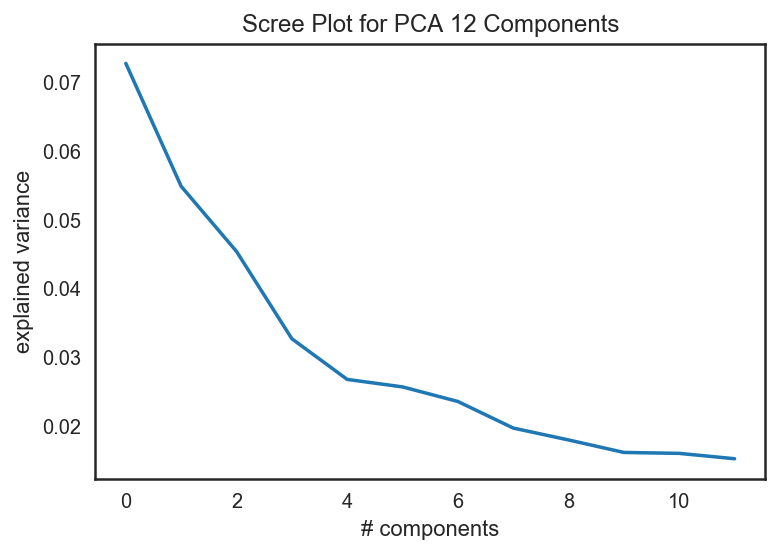

In [251]:
%matplotlib inline
plt.plot(pca12.explained_variance_ratio_)
plt.xlabel('# components')
plt.ylabel('explained variance');
plt.title('Scree Plot for PCA 12 Components')
#plt.savefig('scree.png', format='png', transparent=True)
plt.show();

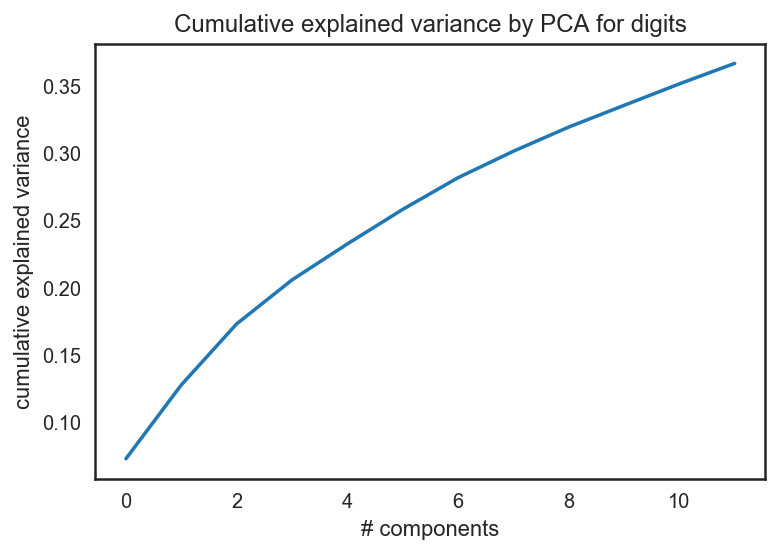

In [43]:
plt.plot(np.cumsum(pca12.explained_variance_ratio_))
plt.xlabel('# components')
plt.ylabel('cumulative explained variance');
plt.title('Cumulative explained variance by PCA for digits');

In [44]:
# Look at 3 primary components
pca3 = PCA(n_components=3)
pca3.fit(X_trans)
pca3_train = pca3.transform(X_trans)
pd.DataFrame(pca3_train)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

0         1         2
0    -0.311455 -0.236758  0.062602
1     0.773614 -0.426195  0.987077
2    -0.694116  1.235083  0.479860
3    -0.379335 -0.897407  1.009035
4    -0.177317  0.035500  0.233278
...        ...       ...       ...
1005 -0.807721  0.088162 -0.394364
1006  1.270270  0.845374  0.469767
1007  0.221990 -1.458087  1.831760
1008 -0.982723 -0.392674  0.066648
1009  0.108943 -0.306927  0.440148

[1010 rows x 3 columns]

In [45]:
pca3_component_df = pd.DataFrame(pca3.components_, columns=df.columns)
pca3_component_df


Music  Slow songs or fast songs     Dance      Folk   Country  \
0 -0.017374                  0.031824 -0.025516 -0.060140 -0.004678   
1  0.010809                 -0.012718 -0.016009  0.132464  0.107268   
2 -0.024509                 -0.045118 -0.169796  0.014684  0.006416   

   Classical music   Musical       Pop      Rock  Metal or Hardrock  ...  \
0        -0.043445 -0.129591 -0.066428  0.010704           0.082355  ...   
1         0.209228  0.109223 -0.046688  0.105271           0.132452  ...   
2         0.061831 -0.023076 -0.127830  0.084770           0.125644  ...   

        Age    Height    Weight  Number of siblings  Education  Gender_male  \
0  0.010697  0.039435  0.058701            0.000563  -0.001888     0.386561   
1  0.032001  0.008440  0.016379            0.013320   0.037452     0.085877   
2 -0.001807 -0.004338 -0.006472            0.000969  -0.001168    -0.020084   

   Left - right handed_right handed  Only child_yes  Village - town_village  \
0                         -0.013888       -0.000950               -0.048895   
1                         -0.008391       -0.026039                0.062163   
2                          0.003051       -0.022993               -0.005589   

   House - block of flats_house/bungalow  
0                              -0.050291  
1                               0.061125  
2                              -0.013585  

[3 rows x 150 columns]

In [46]:
test = pca3_component_df.copy(deep=True).T
test = pd.DataFrame(test)
test

0         1         2
Music                                 -0.017374  0.010809 -0.024509
Slow songs or fast songs               0.031824 -0.012718 -0.045118
Dance                                 -0.025516 -0.016009 -0.169796
Folk                                  -0.060140  0.132464  0.014684
Country                               -0.004678  0.107268  0.006416
...                                         ...       ...       ...
Gender_male                            0.386561  0.085877 -0.020084
Left - right handed_right handed      -0.013888 -0.008391  0.003051
Only child_yes                        -0.000950 -0.026039 -0.022993
Village - town_village                -0.048895  0.062163 -0.005589
House - block of flats_house/bungalow -0.050291  0.061125 -0.013585

[150 rows x 3 columns]

## PCA Feature Weights <a class="anchor" id="weights"></a>
[TOC](#toc)

In [47]:
import pprint as pp
component_dict = {}

for i in range(3):
    test_df = test.sort_values(by = i, ascending = False)
    top_3_words = test_df.iloc[0:3].index
    top_3_scores = test_df.iloc[0:3][i].values
    top_3_stuff = list(zip(top_3_words, top_3_scores))
    bottom_3_words = test_df.iloc[-4:-1].index
    bottom_3_scores = test_df.iloc[-4:-1][i].values
    bottom_3_stuff = list(zip(bottom_3_words, bottom_3_scores))
    component_dict[i] = {'top_3_stuff': top_3_stuff,
                         'bottom_3_stuff': bottom_3_stuff}

pp.pprint(component_dict)

{0: {'bottom_3_stuff': [('Spiders', -0.15516107654080397),
                        ('Romantic', -0.16810662317364647),
                        ('Reading', -0.16814371654941024)],
     'top_3_stuff': [('Gender_male', 0.38656053024791615),
                     ('Cars', 0.16425776606270398),
                     ('PC', 0.14863487050752722)]},
 1: {'bottom_3_stuff': [('Celebrities', -0.0900029327928574),
                        ('Rats', -0.09560354754794588),
                        ('Spiders', -0.0992112803635505)],
     'top_3_stuff': [('Classical music', 0.20922811858553803),
                     ('Musical instruments', 0.1926972922616902),
                     ('Opera', 0.18084928390664365)]},
 2: {'bottom_3_stuff': [('Shopping', -0.20896031576377638),
                        ('Shopping centres', -0.21205465562623957),
                        ('Spending on looks', -0.21816074058917442)],
     'top_3_stuff': [('Metal or Hardrock', 0.12564431346875346),
                     ('Alternative

Text(0.5, 1.0, 'Feature Weights PC1')

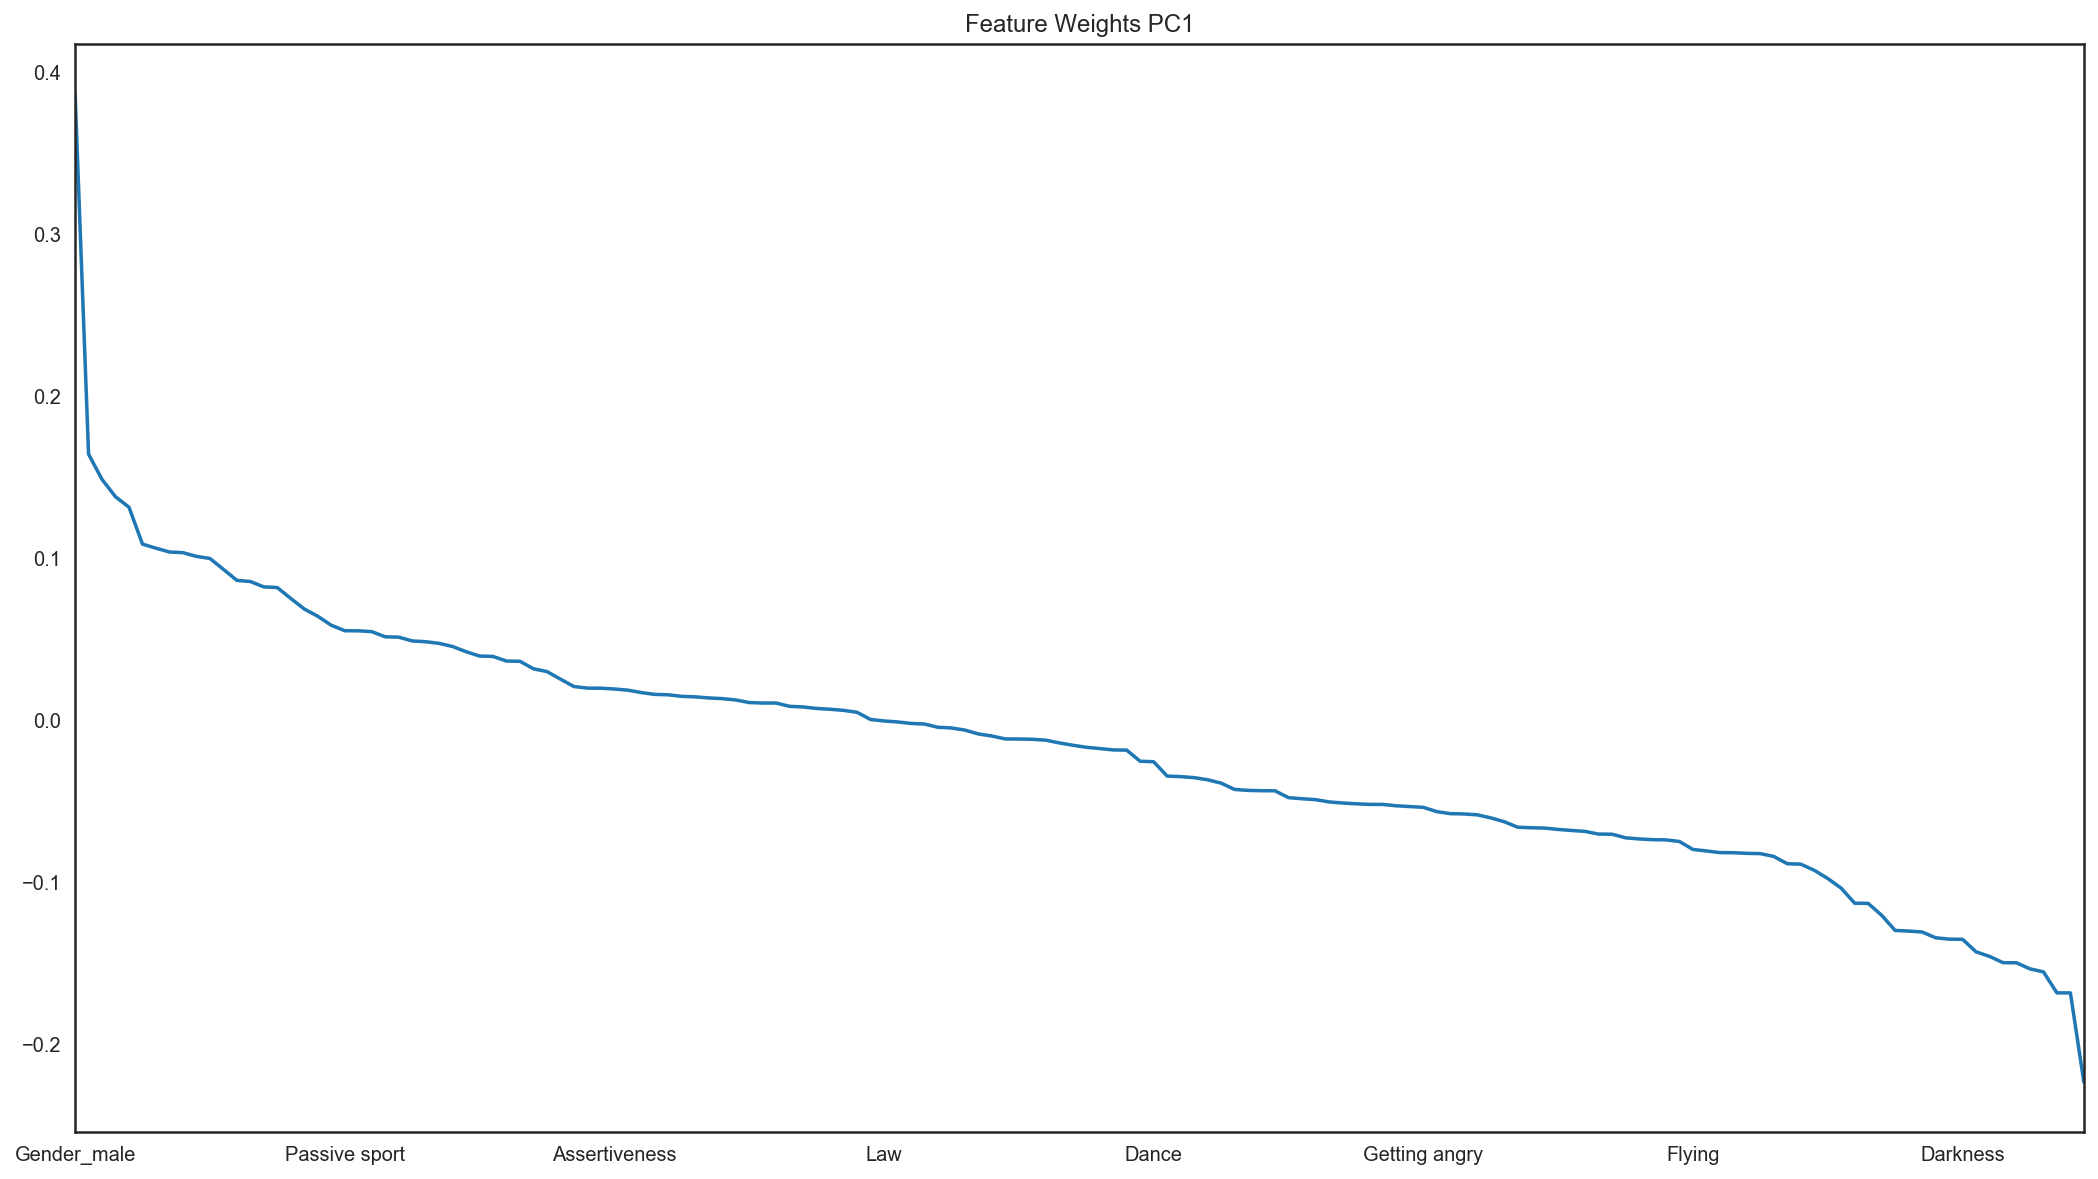

In [48]:
fig = plt.figure(figsize=(18,10))
test[0].sort_values(ascending=False).plot();
plt.title('Feature Weights PC1')

Text(0.5, 1.0, 'Feature Weights PC2')

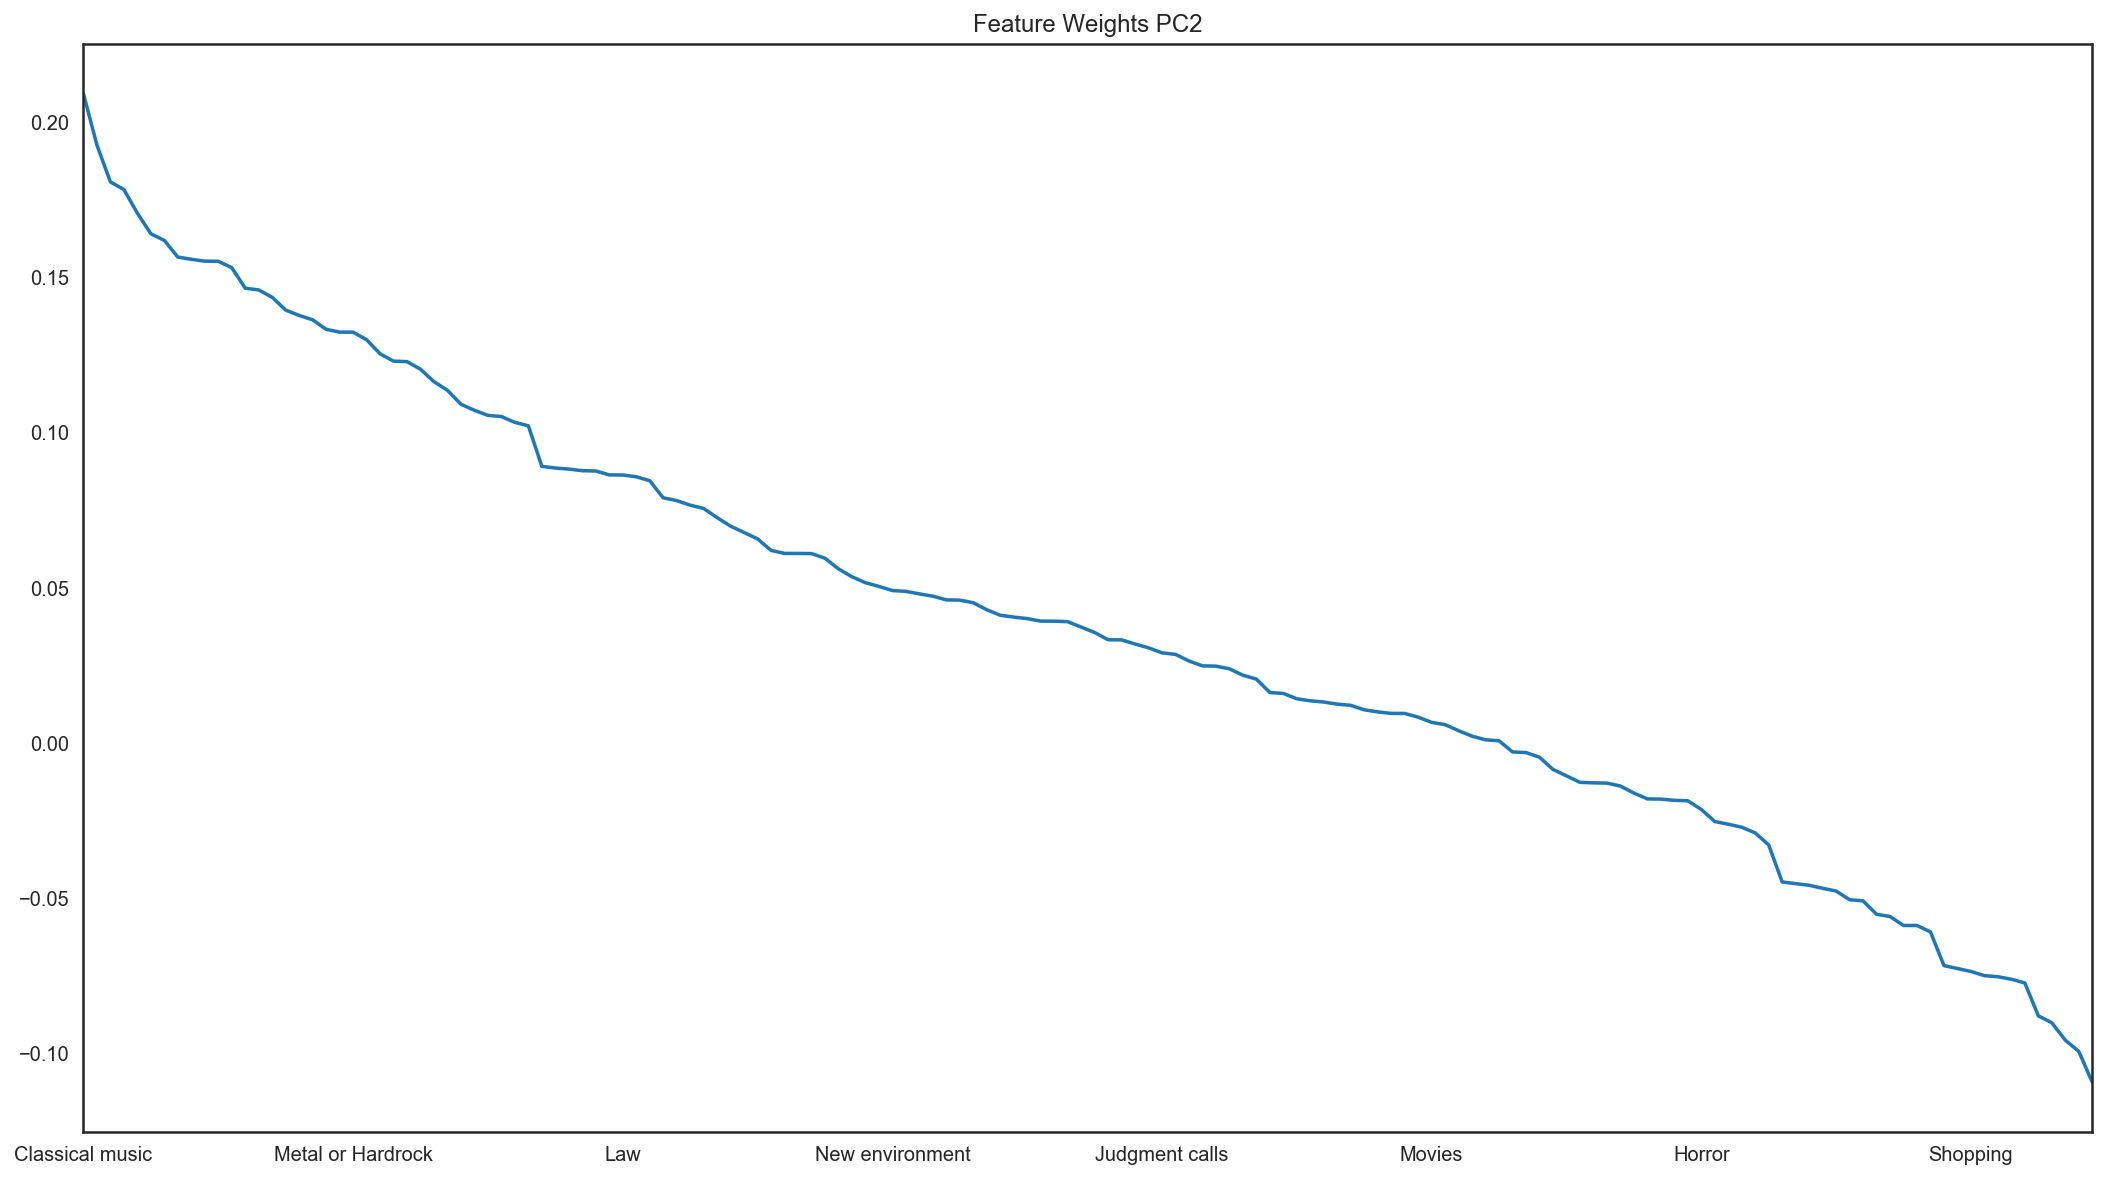

In [49]:
fig = plt.figure(figsize=(18,10))
test[1].sort_values(ascending=False).plot();
plt.title('Feature Weights PC2')

Text(0.5, 1.0, 'Feature Weights PC3')

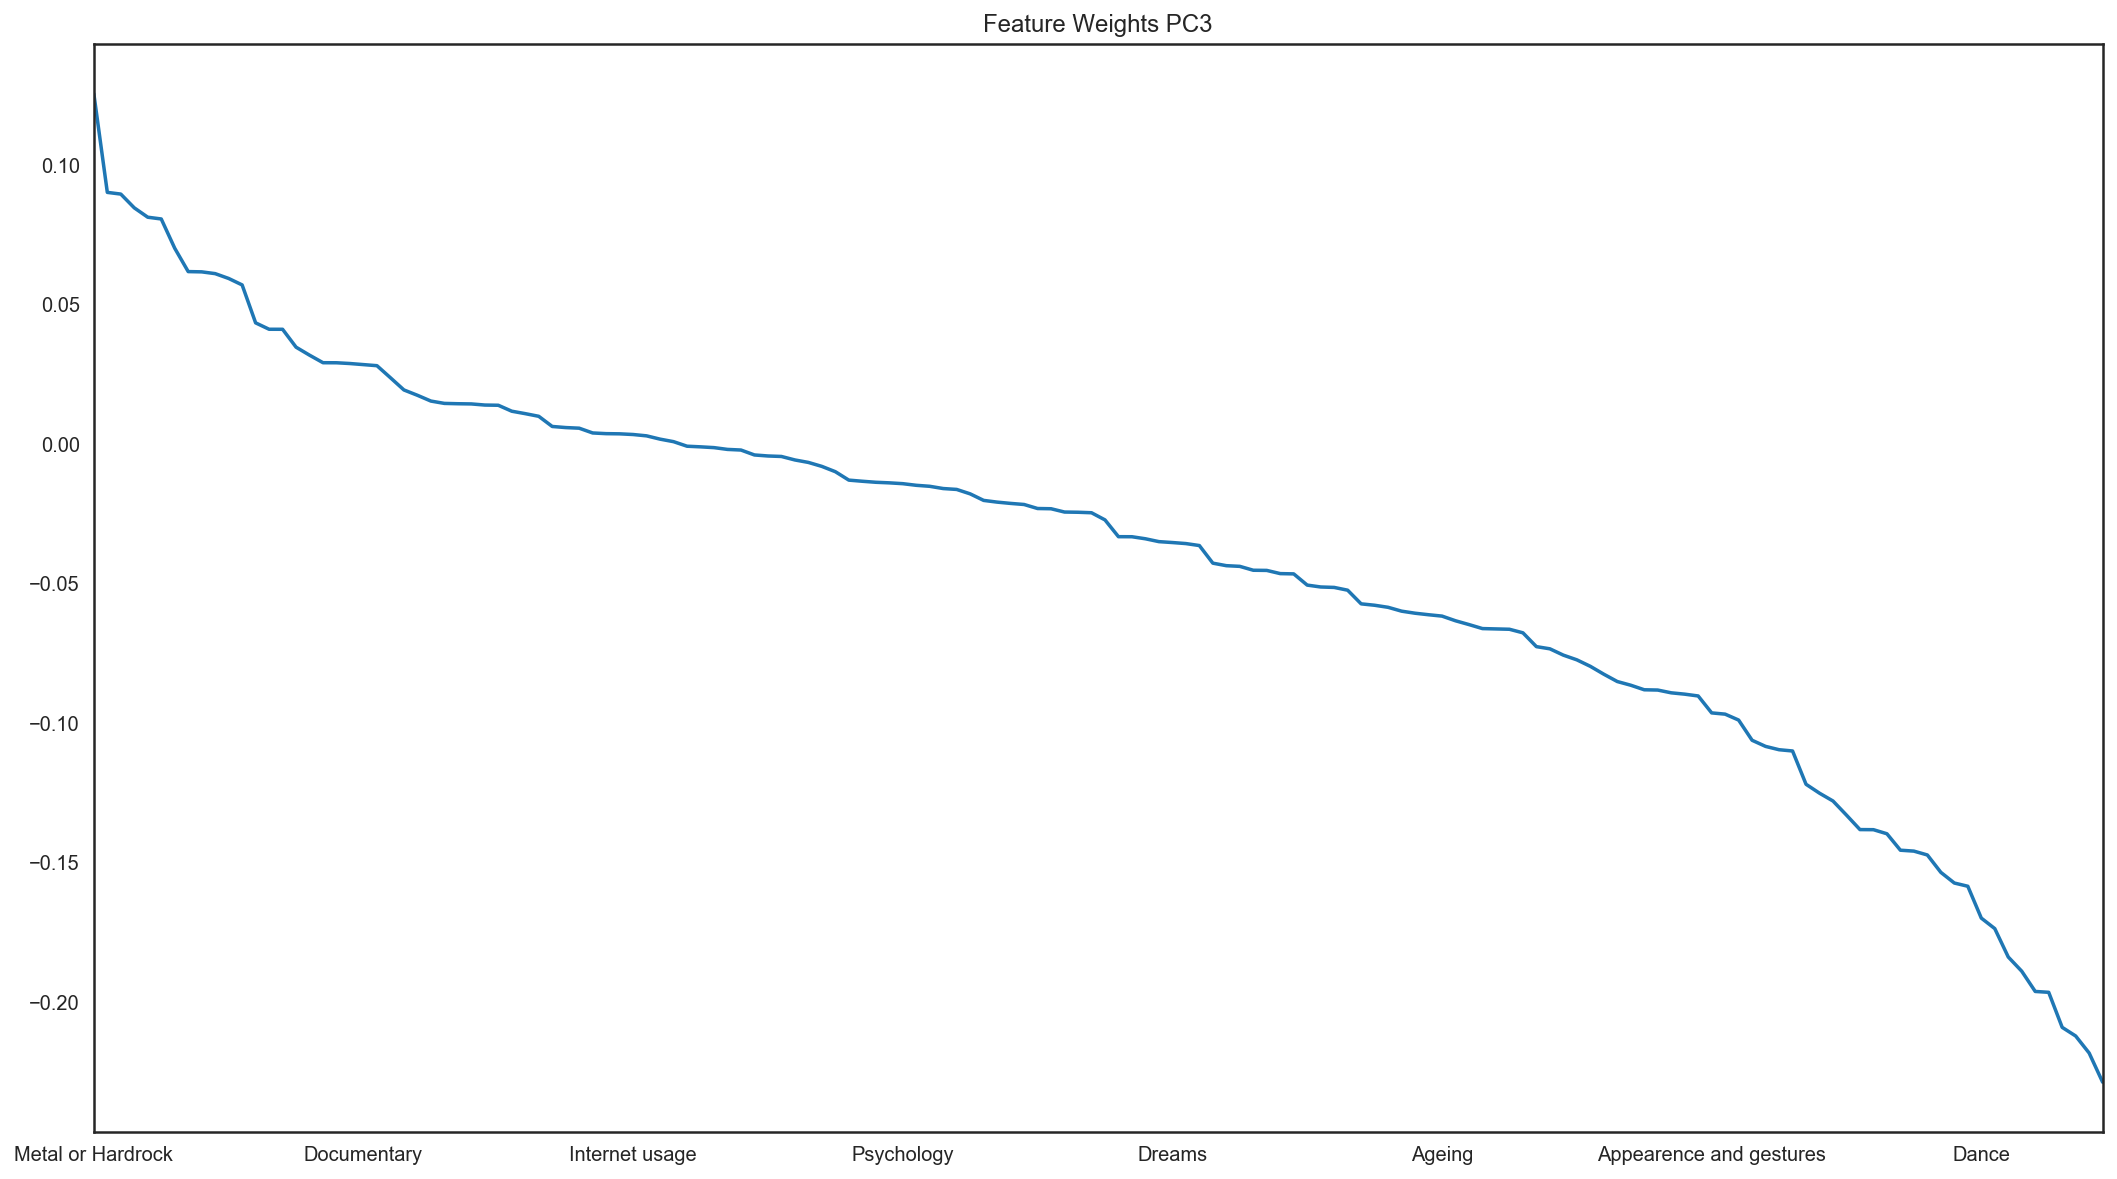

In [50]:
# %matplotlib inline
fig = plt.figure('Feature Weights PC3', figsize=(18,10))
test[2].sort_values(ascending=False).plot()
plt.title('Feature Weights PC3')


In [51]:
# Look at 4 primary components
pca4 = PCA(n_components=4)
pca4.fit(X_trans)
pca4_train = pca4.transform(X_trans)
pd.DataFrame(pca4_train)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

0         1         2         3
0    -0.311456 -0.236751  0.062528  0.793084
1     0.773613 -0.426196  0.987022 -0.823287
2    -0.694118  1.235077  0.479845 -1.186131
3    -0.379333 -0.897403  1.008938 -0.403491
4    -0.177318  0.035502  0.233369  0.973126
...        ...       ...       ...       ...
1005 -0.807722  0.088174 -0.394324 -1.117614
1006  1.270268  0.845376  0.469782  2.524467
1007  0.221990 -1.458086  1.831821 -0.990642
1008 -0.982723 -0.392677  0.066652 -0.860306
1009  0.108943 -0.306929  0.440153  1.794552

[1010 rows x 4 columns]

## Modeling <a class="anchor" id="modeling"></a>
[TOC](#toc)

## K-Means <a class="anchor" id="kmeans"></a>

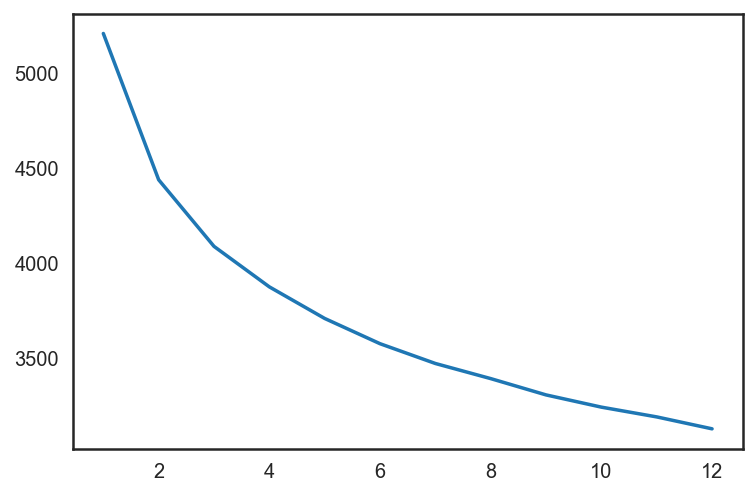

In [52]:
inertia_set = []
for i in range(1,13):
    km = KMeans(n_clusters=i, n_init=20, random_state=5);
    km.fit(pca12_train);
    inertia_set.append(km.inertia_)

plt.plot(np.arange(1,13), inertia_set)
plt.show();

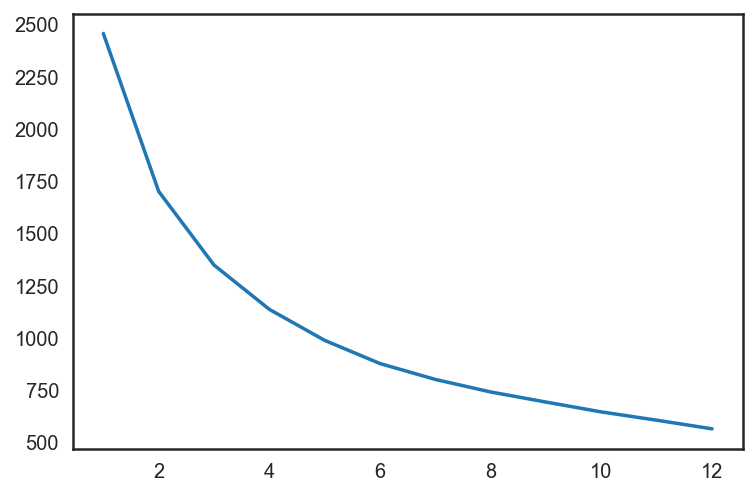

In [53]:
inertia_set = []
for i in range(1,13):
    km = KMeans(n_clusters=i, n_init=20, random_state=5);
    km.fit(pca3_train);
    inertia_set.append(km.inertia_)

plt.plot(np.arange(1,13), inertia_set)
plt.show();

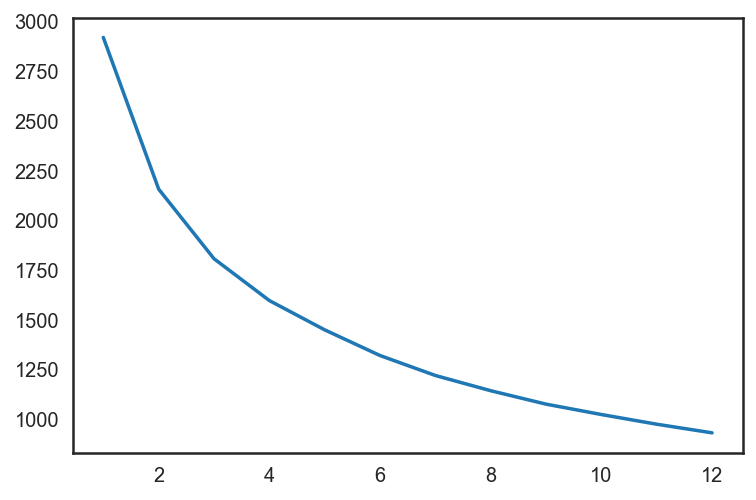

In [54]:
inertia_set = []
for i in range(1,13):
    km = KMeans(n_clusters=i, n_init=20, random_state=5);
    km.fit(pca4_train);
    inertia_set.append(km.inertia_)

plt.plot(np.arange(1,13), inertia_set)
plt.show();

Our inertia is lowest when we use 3 PCs. Let's continue using those.

In [55]:
km3 = KMeans(n_clusters=3, random_state=5).fit(pca3_train)

In [56]:
km3.inertia_

1348.1076219019965

In [57]:
km3_predict = km3.predict(pca3_train)
centroids = km3.cluster_centers_
km3_predict

array([1, 2, 0, ..., 2, 1, 1], dtype=int32)

In [58]:
test = pca3_train.copy()
test.shape
km3_predict.shape
km3_predict_col = km3_predict.reshape((1010, 1))
km3_predict_col.shape
km3_predict_col = np.append(test, km3_predict_col, 1)
km3_predict_col.shape
km3_predict_df = pd.DataFrame(km3_predict_col)
km3_predict_cols = ['pca1', 'pca2', 'pca3', 'cluster']
km3_predict_df.columns = km3_predict_cols
km3_predict_df

(1010, 3)

(1010,)

(1010, 1)

(1010, 4)

pca1      pca2      pca3  cluster
0    -0.311455 -0.236758  0.062602      1.0
1     0.773614 -0.426195  0.987077      2.0
2    -0.694116  1.235083  0.479860      0.0
3    -0.379335 -0.897407  1.009035      1.0
4    -0.177317  0.035500  0.233278      1.0
...        ...       ...       ...      ...
1005 -0.807721  0.088162 -0.394364      1.0
1006  1.270270  0.845374  0.469767      2.0
1007  0.221990 -1.458087  1.831760      2.0
1008 -0.982723 -0.392674  0.066648      1.0
1009  0.108943 -0.306927  0.440148      1.0

[1010 rows x 4 columns]

In [59]:
def cluster_color(cluster_label):
    if cluster_label == 0:
        return 'red'
    elif cluster_label == 1:
        return 'yellow'
    else:
        return 'orange'

km3_predict_df['color'] = km3_predict_df['cluster'].apply(cluster_color)

In [60]:
km3_predict_df.head()

pca1      pca2      pca3  cluster   color
0 -0.311455 -0.236758  0.062602      1.0  yellow
1  0.773614 -0.426195  0.987077      2.0  orange
2 -0.694116  1.235083  0.479860      0.0     red
3 -0.379335 -0.897407  1.009035      1.0  yellow
4 -0.177317  0.035500  0.233278      1.0  yellow

<IPython.core.display.Javascript object>


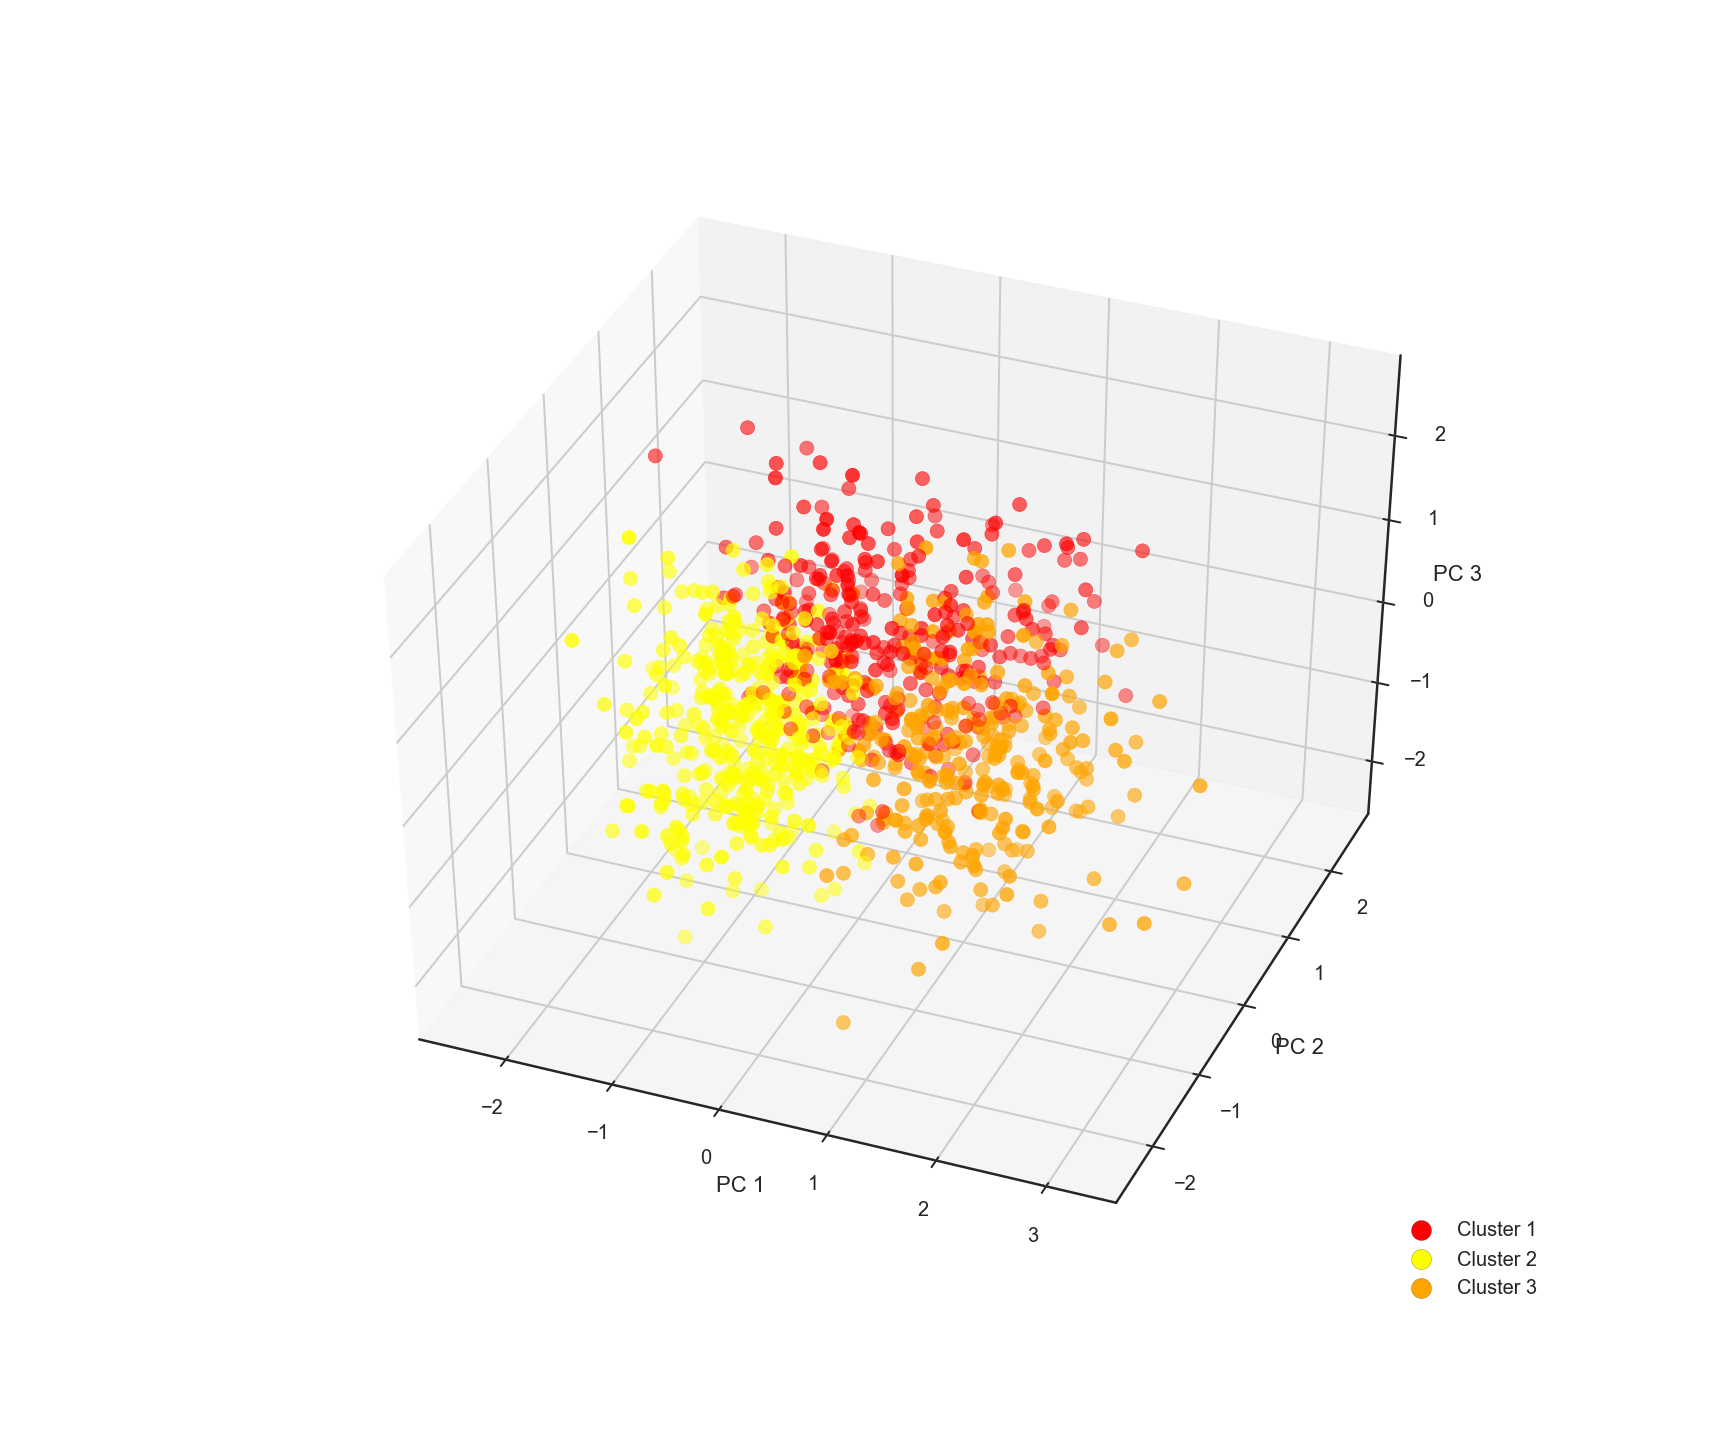

Text(0.5, 0, 'PC 1')

Text(0.5, 0, 'PC 2')

Text(0.5, 0, 'PC 3')

<function matplotlib.pyplot.legend(*args, **kwargs)>

In [253]:
%matplotlib notebook

fig = plt.figure('K-Means on Slovakian Youth', figsize=(12,10))
ax = fig.gca(projection='3d')
ax.scatter(km3_predict_col[:,0],km3_predict_col[:,1],km3_predict_col[:,2], c=km3_predict_df['color'],  cmap='autumn', s=50)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.legend


# ax.legend()
# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30)
    plt.draw()
    plt.pause(.001)
    
labelTups = [('Cluster 1', 0), ('Cluster 2', 1), ('Cluster 3', 2)]
colors = ['red', 'yellow', 'orange']
custom_lines = [Line2D([0], [0], linestyle="none", marker='.', markeredgecolor='k', markerfacecolor=c, markeredgewidth=.1, markersize=20) for c in colors]
ax.legend(custom_lines, [lt[0] for lt in labelTups], loc='right', bbox_to_anchor=(1, 0))

In [67]:
km4 = KMeans(n_clusters=6, random_state=5).fit(pca4_train)
km4.inertia_

1320.809573216149

Text(0.5, 0, 'PC 1')

Text(0, 0.5, 'PC 2')

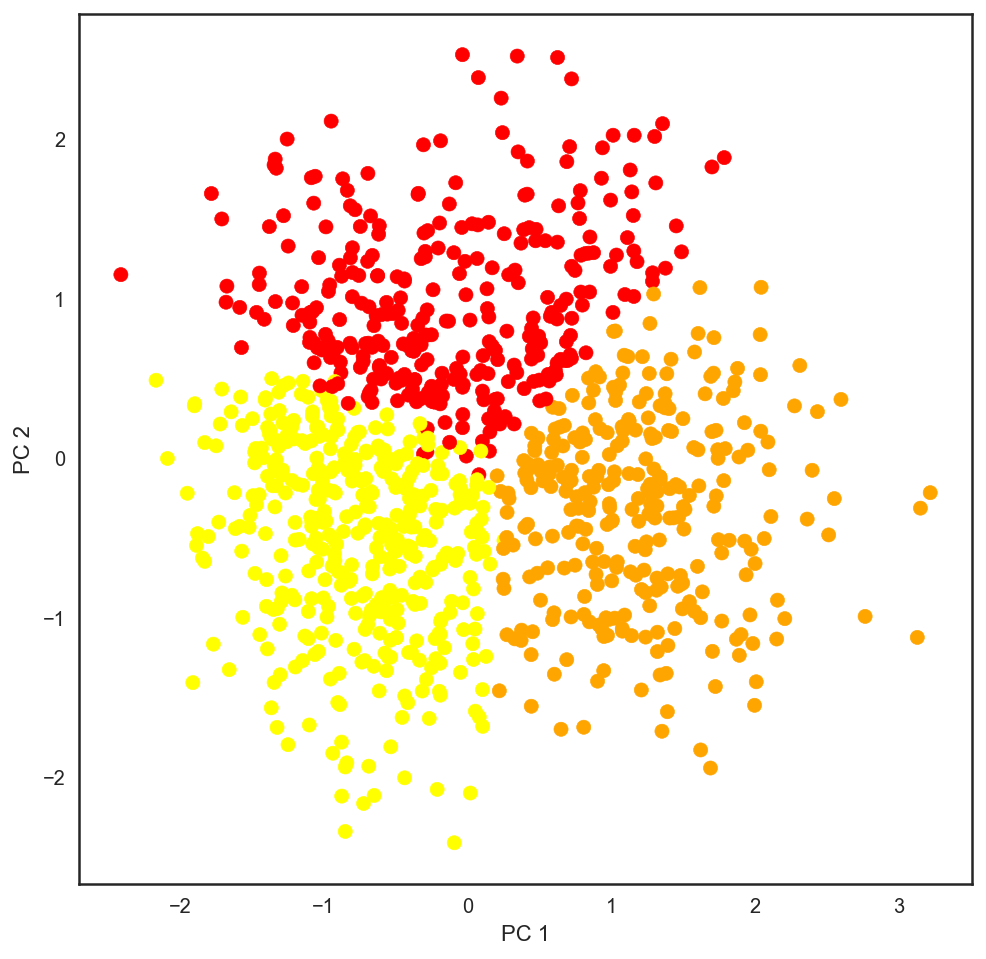

In [81]:
# %matplotlib inline
# fig = plt.figure('K-Means on Slovakian Youth', figsize=(8,8))
# plt.scatter(km3_predict_col[:,0],km3_predict_col[:,1], c=km3_predict_col[:,3], cmap='autumn', s=50)
# plt.xlabel('PC 1')
# plt.ylabel('PC 2')

fig = plt.figure('K-Means on Slovakian Youth', figsize=(8,8));
plt.scatter(km3_predict_df['pca1'],km3_predict_df['pca2'], c=km3_predict_df['color'], s=50);
plt.xlabel('PC 1');
plt.ylabel('PC 2');

## t-SNE  <a class="anchor" id="tsne"></a>  
**t-Distributed Stochastic Neighbor Embedding**  
[TOC](#toc)

In [256]:
tsne = TSNE(n_components=2, verbose=1, perplexity=90, n_iter=350)
tsne_results = tsne.fit_transform(pca3_train)
#print('Cumulative explained variation for 12 principal components: {}'.format(np.sum(pca12.explained_variance_ratio_)))

[t-SNE] Computing 271 nearest neighbors...
[t-SNE] Indexed 1010 samples in 0.000s...
[t-SNE] Computed neighbors for 1010 samples in 0.043s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1010
[t-SNE] Computed conditional probabilities for sample 1010 / 1010
[t-SNE] Mean sigma: 0.530189
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.878803
[t-SNE] KL divergence after 350 iterations: 0.727552


In [97]:
tsne_df = pd.DataFrame(pca3_train)
tsne_df['tsne-2d-one'] = tsne_results[:,0]
tsne_df['tsne-2d-two'] = tsne_results[:,1]
tsne_df['cluster'] = km3_predict
tsne_df

0         1         2  tsne-2d-one  tsne-2d-two  cluster
0    -0.311455 -0.236758  0.062602    -1.547407     4.143360        1
1     0.773614 -0.426195  0.987077    -9.660729    -0.578301        2
2    -0.694116  1.235083  0.479860     3.268616    -3.440478        0
3    -0.379335 -0.897407  1.009035     8.594351     0.855845        1
4    -0.177317  0.035500  0.233278    -1.497497     0.859365        1
...        ...       ...       ...          ...          ...      ...
1005 -0.807721  0.088162 -0.394364     2.667517     6.797411        1
1006  1.270270  0.845374  0.469767    -3.230534    -5.815008        2
1007  0.221990 -1.458087  1.831760     8.225305    -1.063077        2
1008 -0.982723 -0.392674  0.066648     8.526506     6.683544        1
1009  0.108943 -0.306927  0.440148    -3.385488     1.877788        1

[1010 rows x 6 columns]

In [98]:
tsne_df['color'] = tsne_df['cluster'].apply(cluster_color)
tsne_df.head()

0         1         2  tsne-2d-one  tsne-2d-two  cluster   color
0 -0.311455 -0.236758  0.062602    -1.547407     4.143360        1  yellow
1  0.773614 -0.426195  0.987077    -9.660729    -0.578301        2  orange
2 -0.694116  1.235083  0.479860     3.268616    -3.440478        0     red
3 -0.379335 -0.897407  1.009035     8.594351     0.855845        1  yellow
4 -0.177317  0.035500  0.233278    -1.497497     0.859365        1  yellow

In [99]:
fig = plt.figure('K-Means on Slovakian Youth', figsize=(8,8))
plt.scatter(tsne_df["tsne-2d-one"], tsne_df["tsne-2d-two"], c=tsne_df['color'], s=50, alpha=0.5)
plt.show()
#ax.scatter(km3_predict_col[:,0],km3_predict_col[:,1],km3_predict_col[:,2], c=km3_predict_col[:,3], cmap='autumn', s=50)


In [100]:
# Add 'Gender_male' column to tsne_df
tsne_df['Gender_male'] = df["Gender_male"]
tsne_df.head(10)

0         1         2  tsne-2d-one  tsne-2d-two  cluster   color  \
0 -0.311455 -0.236758  0.062602    -1.547407     4.143360        1  yellow   
1  0.773614 -0.426195  0.987077    -9.660729    -0.578301        2  orange   
2 -0.694116  1.235083  0.479860     3.268616    -3.440478        0     red   
3 -0.379335 -0.897407  1.009035     8.594351     0.855845        1  yellow   
4 -0.177317  0.035500  0.233278    -1.497497     0.859365        1  yellow   
5  1.157902  1.014647  0.457989    -2.949831    -6.020964        0     red   
6 -1.050299  0.193872 -0.407391     4.503620     6.060957        1  yellow   
7  0.721185 -0.994917 -0.276045   -13.748899    -8.205200        2  orange   
8 -0.788975 -1.197583  1.830768     9.206594    -0.318089        1  yellow   
9 -1.748767  0.078183 -0.055311     7.270873     6.075988        1  yellow   

   Gender_male  
0            0  
1            0  
2            0  
3            0  
4            0  
5            1  
6            0  
7            1  
8            0  
9            0

In [101]:
def sex_color(gender_label):
    if gender_label == 0:
        return 'magenta'
    else:
        return 'dodgerblue'

tsne_df['sex'] = tsne_df['Gender_male'].apply(sex_color)

In [102]:
tsne_cols = ['pca1', 'pca2', 'pca3', 'tsne-2d-one', 'tsne-2d-two', 'cluster', 'color', 'Gender_male', 'sex']
tsne_df.columns = tsne_cols

In [103]:
tsne_df.head(10)

pca1      pca2      pca3  tsne-2d-one  tsne-2d-two  cluster   color  \
0 -0.311455 -0.236758  0.062602    -1.547407     4.143360        1  yellow   
1  0.773614 -0.426195  0.987077    -9.660729    -0.578301        2  orange   
2 -0.694116  1.235083  0.479860     3.268616    -3.440478        0     red   
3 -0.379335 -0.897407  1.009035     8.594351     0.855845        1  yellow   
4 -0.177317  0.035500  0.233278    -1.497497     0.859365        1  yellow   
5  1.157902  1.014647  0.457989    -2.949831    -6.020964        0     red   
6 -1.050299  0.193872 -0.407391     4.503620     6.060957        1  yellow   
7  0.721185 -0.994917 -0.276045   -13.748899    -8.205200        2  orange   
8 -0.788975 -1.197583  1.830768     9.206594    -0.318089        1  yellow   
9 -1.748767  0.078183 -0.055311     7.270873     6.075988        1  yellow   

   Gender_male         sex  
0            0     magenta  
1            0     magenta  
2            0     magenta  
3            0     magenta  
4            0     magenta  
5            1  dodgerblue  
6            0     magenta  
7            1  dodgerblue  
8            0     magenta  
9            0     magenta

In [104]:
# This cell was the original way of doing the cell above
# color_map = {0 :'magenta',
#              1 : 'dodgerblue',
# }

#label_color = [color_map[l] for l in df.Gender_male]

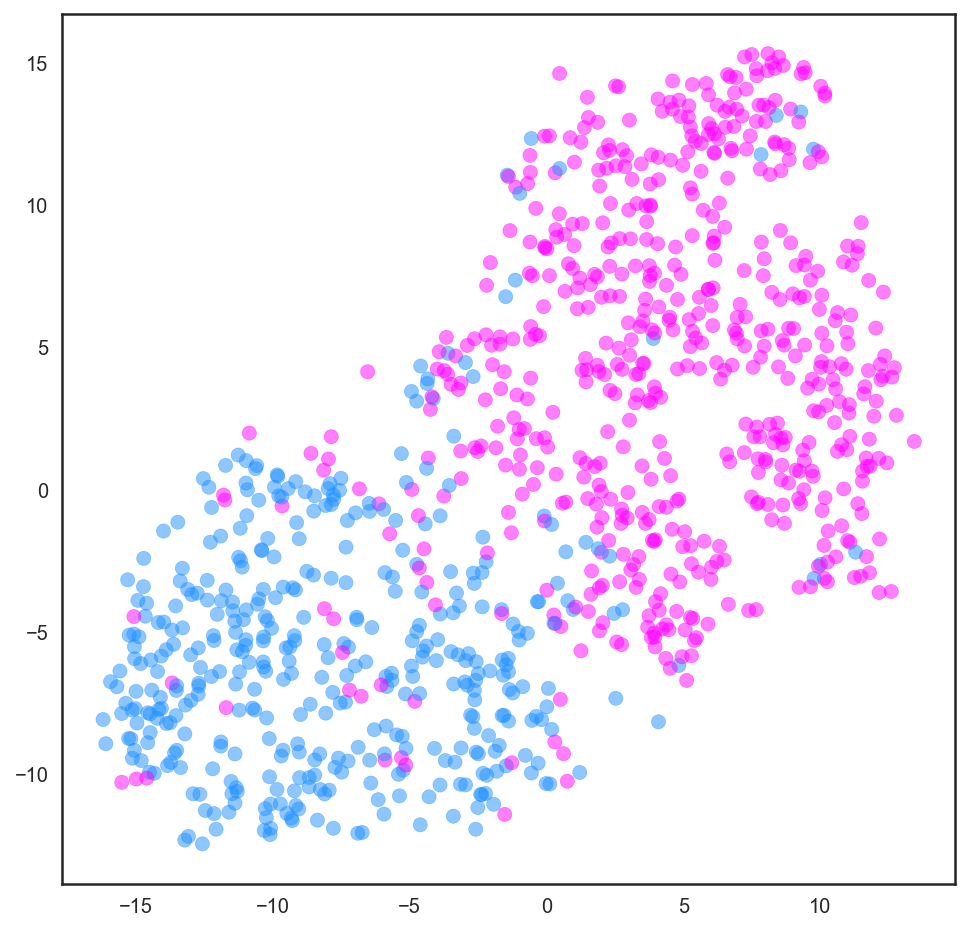

In [105]:
%matplotlib inline
fig = plt.figure('K-Means on Slovakian Youth', figsize=(8,8))
plt.scatter(tsne_df["tsne-2d-one"], tsne_df["tsne-2d-two"], c=tsne_df['sex'], s=50, alpha=0.5)

<IPython.core.display.Javascript object>


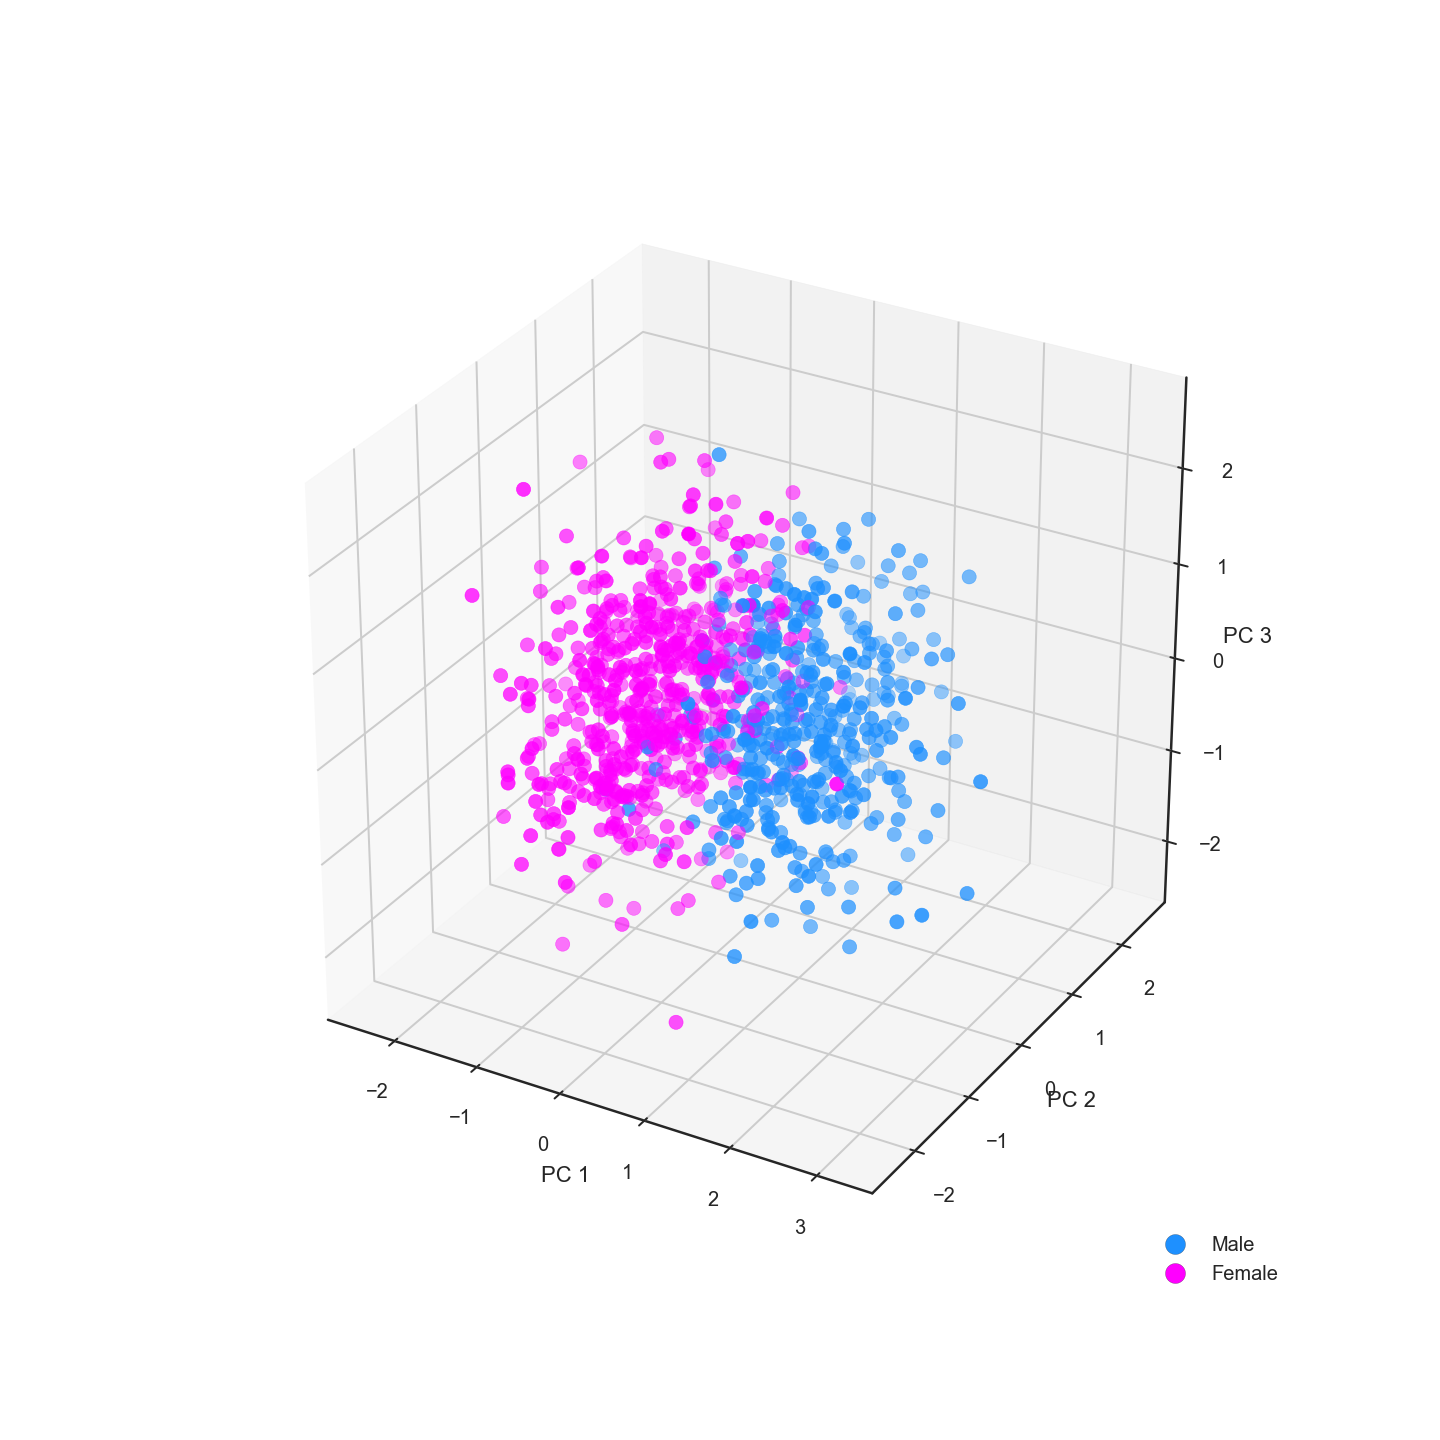

In [112]:
%matplotlib notebook

fig = plt.figure('K-Means on Slovakian Youth', figsize=(10,10))
ax = fig.gca(projection='3d')
ax.scatter(tsne_df['pca1'],tsne_df['pca2'],tsne_df['pca3'], c=tsne_df['sex'], s=50)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')


# ax.legend()
# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30)
    plt.draw()
    plt.pause(.001)
    
sexTups = [('Male', 0), ('Female', 1)]
colors = ['dodgerblue', 'magenta']
custom_lines = [Line2D([0], [0], linestyle="none", marker='.', markeredgecolor='k', markerfacecolor=c, markeredgewidth=.1, markersize=20) for c in colors]
ax.legend(custom_lines, [lt[0] for lt in sexTups], loc='right', bbox_to_anchor=(1, 0));


In [119]:
# Do TSNE for 3 dimensions
tsne = TSNE(n_components=3, verbose=1, perplexity=75, n_iter=350, random_state=5)
tsne_results = tsne.fit_transform(pca3_train)

tsne_df['tsne-3d-one'] = tsne_results[:,0]
tsne_df['tsne-3d-two'] = tsne_results[:,1]
tsne_df['tsne-3d-three'] = tsne_results[:,2]
tsne_df

[t-SNE] Computing 226 nearest neighbors...
[t-SNE] Indexed 1010 samples in 0.001s...
[t-SNE] Computed neighbors for 1010 samples in 0.037s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1010
[t-SNE] Computed conditional probabilities for sample 1010 / 1010
[t-SNE] Mean sigma: 0.494501
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.477974
[t-SNE] KL divergence after 350 iterations: 0.552161


pca1      pca2      pca3  tsne-2d-one  tsne-2d-two  cluster   color  \
0    -0.311455 -0.236758  0.062602    -1.547407     4.143360        1  yellow   
1     0.773614 -0.426195  0.987077    -9.660729    -0.578301        2  orange   
2    -0.694116  1.235083  0.479860     3.268616    -3.440478        0     red   
3    -0.379335 -0.897407  1.009035     8.594351     0.855845        1  yellow   
4    -0.177317  0.035500  0.233278    -1.497497     0.859365        1  yellow   
...        ...       ...       ...          ...          ...      ...     ...   
1005 -0.807721  0.088162 -0.394364     2.667517     6.797411        1  yellow   
1006  1.270270  0.845374  0.469767    -3.230534    -5.815008        2  orange   
1007  0.221990 -1.458087  1.831760     8.225305    -1.063077        2  orange   
1008 -0.982723 -0.392674  0.066648     8.526506     6.683544        1  yellow   
1009  0.108943 -0.306927  0.440148    -3.385488     1.877788        1  yellow   

      Gender_male         sex  tsne-3d-one  tsne-3d-two  tsne-3d-three  
0               0     magenta     0.477986     2.683565      -2.437229  
1               0     magenta    -4.782247    -2.148324      -2.997802  
2               0     magenta     1.274057    -1.347525       1.580679  
3               0     magenta     2.732177     1.393250      -5.219913  
4               0     magenta    -0.137771     1.337835      -1.824602  
...           ...         ...          ...          ...            ...  
1005            0     magenta     4.652205     2.903497       1.215717  
1006            1  dodgerblue    -3.031002    -3.863721       1.343435  
1007            0     magenta    -6.091067    -3.695682      -5.196018  
1008            0     magenta     4.765559     2.209086      -1.516296  
1009            1  dodgerblue    -0.816933     1.287190      -3.287227  

[1010 rows x 12 columns]

# Gender, Spending, Music Analysis <a class="anchor" id="mla"></a>  
[TOC](#toc)

<IPython.core.display.Javascript object>


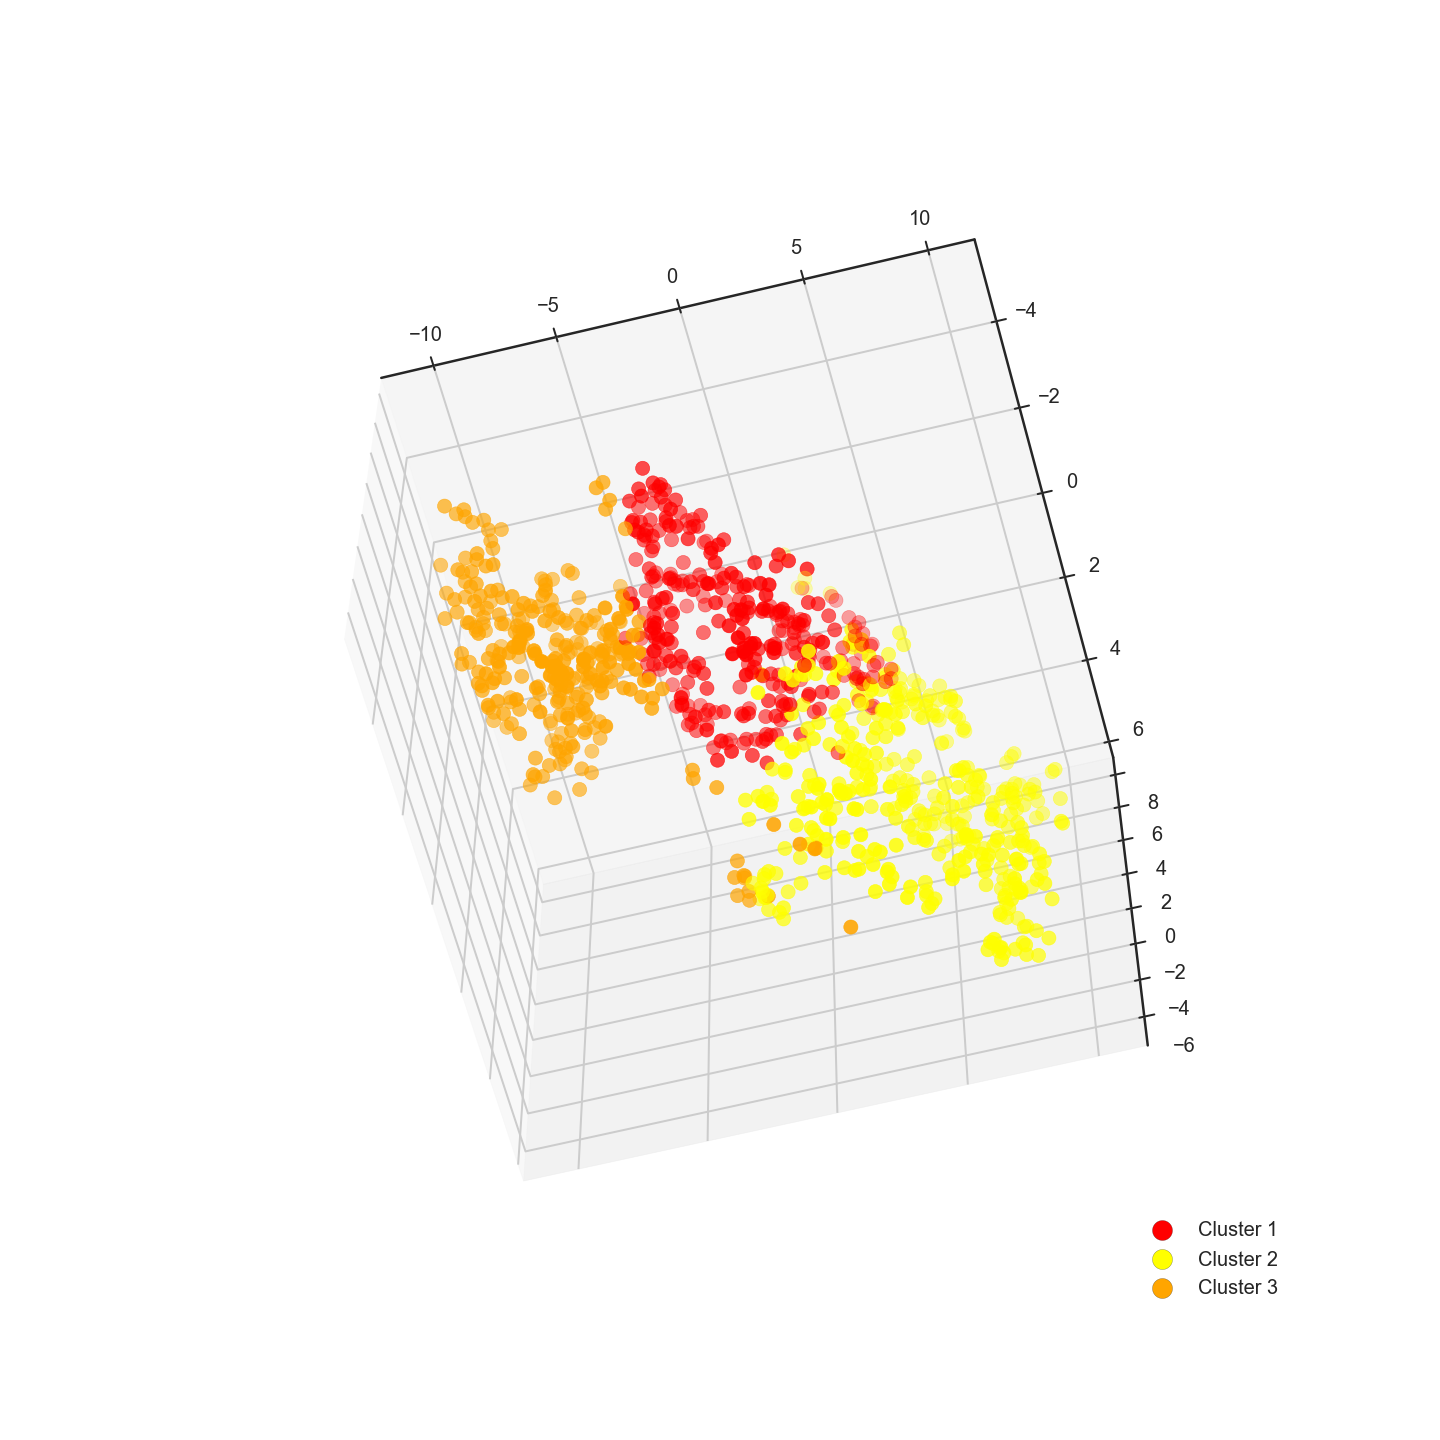

In [252]:
%matplotlib notebook
from matplotlib.lines import Line2D

fig = plt.figure('K-Means on Slovakian Youth', figsize=(10,10))
ax = fig.gca(projection='3d')
ax.scatter(tsne_df["tsne-3d-one"], tsne_df["tsne-3d-two"],tsne_df["tsne-3d-three"], c=tsne_df['color'], s=50)
# ax.set_xlabel('PC 1')
# ax.set_ylabel('PC 2')
# ax.set_zlabel('PC 3')

# rotate the axes and update

labelTups = [('Cluster 1', 0), ('Cluster 2', 1), ('Cluster 3', 2)]
colors = ['red', 'yellow', 'orange']
custom_lines = [Line2D([0], [0], linestyle="none", marker='.', markeredgecolor='k', markerfacecolor=c, markeredgewidth=.1, markersize=20) for c in colors]
ax.legend(custom_lines, [lt[0] for lt in labelTups], loc='right', bbox_to_anchor=(1, 0))

for angle in range(0, 360):
    ax.view_init(30)
    plt.draw()
    plt.pause(.001)

<IPython.core.display.Javascript object>


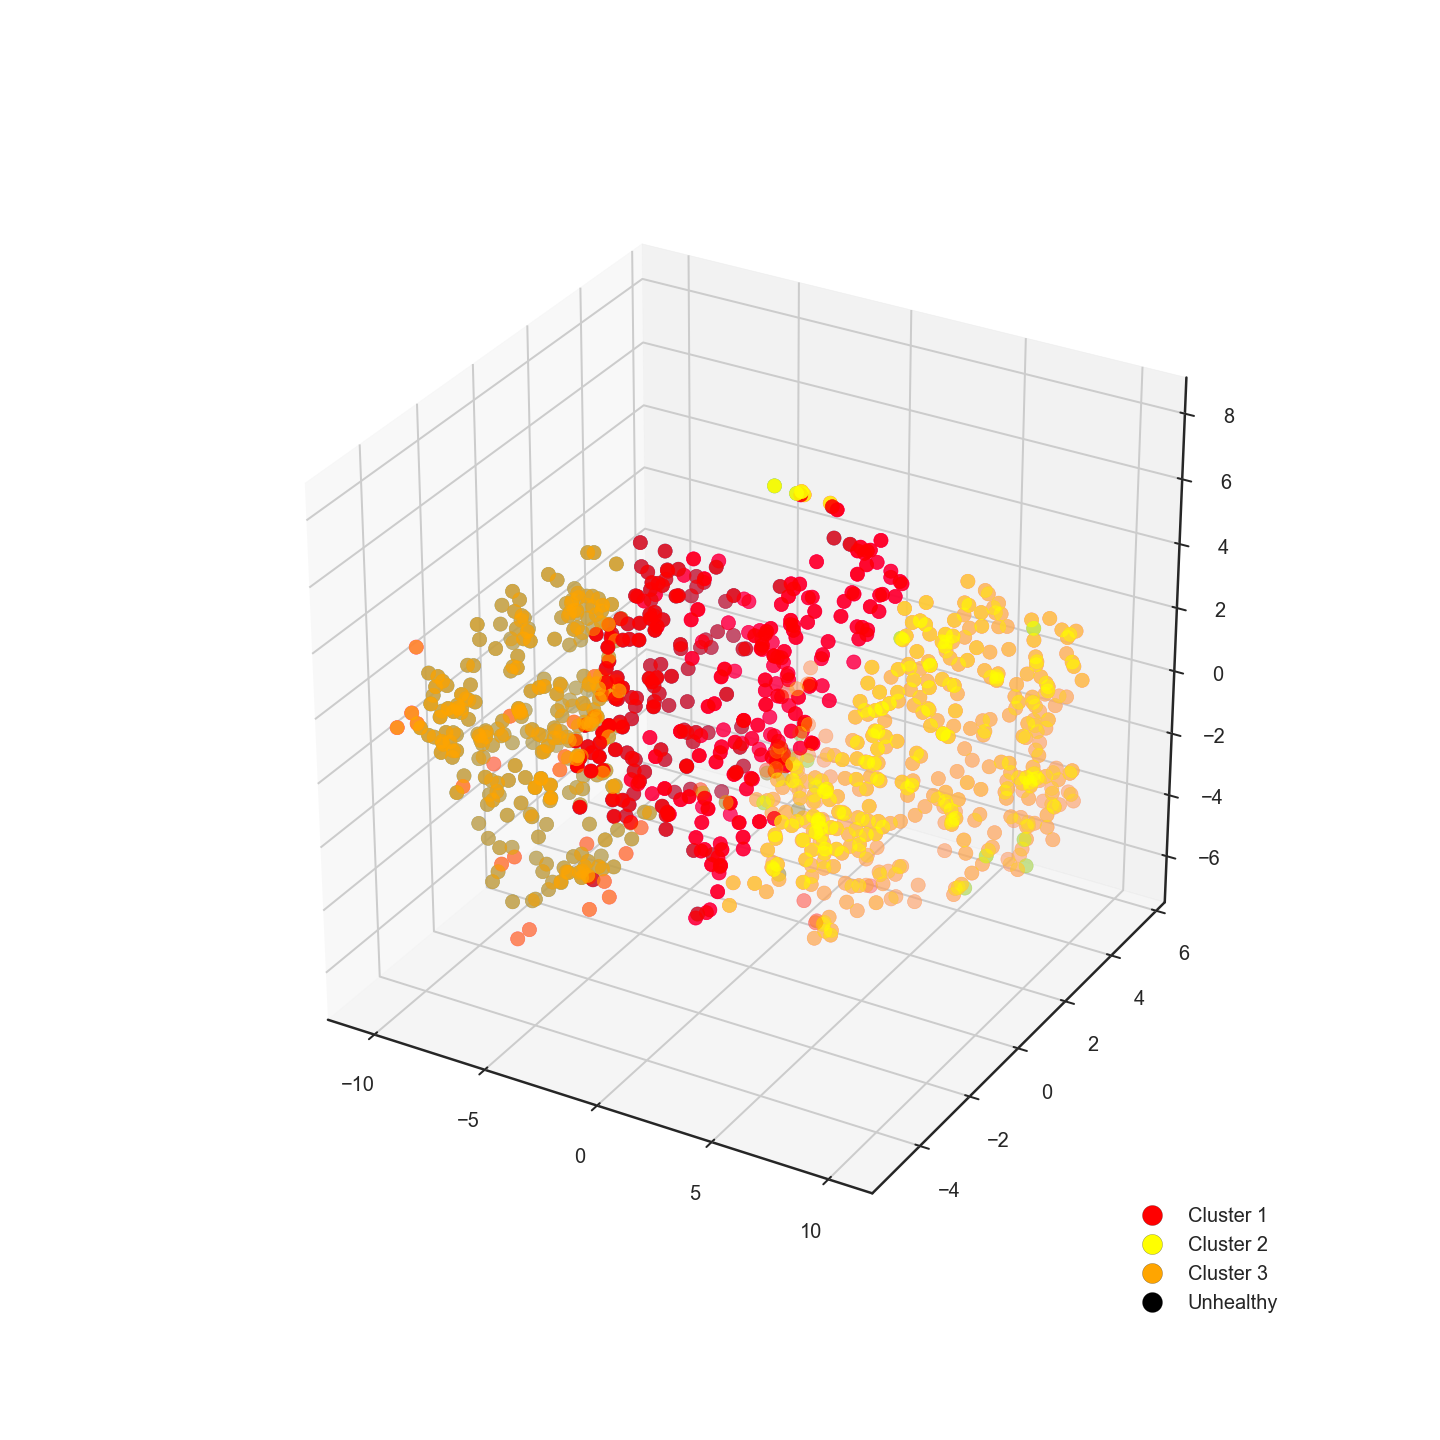

In [158]:
%matplotlib notebook
from matplotlib.lines import Line2D

fig = plt.figure('K-Means on Slovakian Youth', figsize=(10,10))
ax = fig.gca(projection='3d')
ax.scatter(tsne_df["tsne-3d-one"], tsne_df["tsne-3d-two"],tsne_df["tsne-3d-three"], c=tsne_df['sex'], s=50)
# ax.set_xlabel('PC 1')
# ax.set_ylabel('PC 2')
# ax.set_zlabel('PC 3')

# plot centroids

# ax.scatter(centroids[0,3],centroids[0,0],centroids[0,2] ,c='r', s=50, label='centroid')
# ax.scatter(centroids[1,3],centroids[1,0],centroids[1,2] ,c='r', s=50)
# ax.scatter(centroids[2,3],centroids[2,0],centroids[2,2] ,c='r', s=50)

# ax.legend()
# rotate the axes and update

sexTups = [('Male', 0), ('Female', 1)]
colors = ['dodgerblue', 'magenta']
custom_lines = [Line2D([0], [0], linestyle="none", marker='.', markeredgecolor='k', markerfacecolor=c, markeredgewidth=.1, markersize=20) for c in colors]
ax.legend(custom_lines, [lt[0] for lt in sexTups], loc='right', bbox_to_anchor=(1, 0));

for angle in range(0, 360):
    ax.view_init(30)
    plt.draw()
    plt.pause(.001)

In [143]:
tsne_df.head(50)

pca1      pca2      pca3  tsne-2d-one  tsne-2d-two  cluster   color  \
0  -0.311455 -0.236758  0.062602    -1.547407     4.143360        1  yellow   
1   0.773614 -0.426195  0.987077    -9.660729    -0.578301        2  orange   
2  -0.694116  1.235083  0.479860     3.268616    -3.440478        0     red   
3  -0.379335 -0.897407  1.009035     8.594351     0.855845        1  yellow   
4  -0.177317  0.035500  0.233278    -1.497497     0.859365        1  yellow   
5   1.157902  1.014647  0.457989    -2.949831    -6.020964        0     red   
6  -1.050299  0.193872 -0.407391     4.503620     6.060957        1  yellow   
7   0.721185 -0.994917 -0.276045   -13.748899    -8.205200        2  orange   
8  -0.788975 -1.197583  1.830768     9.206594    -0.318089        1  yellow   
9  -1.748767  0.078183 -0.055311     7.270873     6.075988        1  yellow   
10 -0.261274 -0.516587  0.113802    -1.972012     4.389214        1  yellow   
11 -0.198583 -1.098909  0.868026     7.993626     1.061977        1  yellow   
12 -0.691149  0.386554  1.204503    11.516657    -0.847103        0     red   
13 -1.036252 -1.211492 -0.447115     5.919624    13.884958        1  yellow   
14 -1.884987 -0.546304  0.455232    11.113622     6.139903        1  yellow   
15  1.288642  1.162860  0.183018    -2.895437    -6.885431        0     red   
16 -0.265832 -1.631393 -0.086468     8.912154    13.386194        1  yellow   
17 -1.199472 -0.402456  0.517562    10.243477     5.055832        1  yellow   
18  1.287764  1.109523  0.175026    -2.984673    -6.769439        0     red   
19  1.399415  0.174481  0.273390   -10.195687    -4.608941        2  orange   
20  1.157928  1.299842  0.178038    -2.635343    -7.065724        0     red   
21  2.037086  0.775554  0.630318    -9.617275    -3.433615        2  orange   
22 -0.371319 -0.229019  0.665314    -1.068190     1.785694        1  yellow   
23 -1.209094  0.121297  0.004681     6.965521     5.301753        1  yellow   
24 -1.312869  0.414164 -0.964794     3.581579     6.304919        1  yellow   
25 -1.248349 -1.795927 -0.102747     8.481810    15.220419        1  yellow   
26 -0.624108  1.145952 -0.356227     3.740931    -4.439603        0     red   
27 -0.428171 -0.192284  0.411300    -0.808918     2.146096        1  yellow   
28  1.134555 -0.712275 -1.621258   -12.662335   -10.721471        2  orange   
29 -1.900530  0.329046 -0.572231     5.329897     5.566436        1  yellow   
30  0.760789 -0.241248 -0.733594   -10.128307    -8.761393        2  orange   
31 -1.021876 -0.372687  0.540184    10.041205     4.500287        1  yellow   
32 -0.189463 -1.285163 -0.347621     7.995941    12.948203        1  yellow   
33 -0.799521  1.164622 -0.248329     4.117155    -4.242375        0     red   
34  0.850526  1.042542  0.013000    -3.392063    -6.841091        0     red   
35 -0.977193 -0.995610 -0.651451     5.179071    13.104939        1  yellow   
36 -0.844822  0.021287  0.528851     9.535258     3.569364        1  yellow   
37  1.244434  0.405661  0.117551    -9.191801    -5.316421        2  orange   
38 -1.572308  0.694217  0.335177     6.314617    -1.994986        0     red   
39 -0.562719 -0.464639  0.277554    -0.578739     3.920264        1  yellow   
40 -0.091553 -2.410982  0.138790    10.015717    14.187016        1  yellow   
41  1.787063  1.885327  0.900571    -1.581436    -6.533902        0     red   
42 -0.028829  0.461896  0.275285    -1.283630    -1.523955        0     red   
43 -0.805251 -0.667973 -1.157216     2.922925    11.744271        1  yellow   
44 -1.495913  0.248008 -1.186101     3.785784     7.530121        1  yellow   
45 -0.033849  0.445554 -0.641567    -1.140548     7.369116        0     red   
46  0.284023  0.480464 -1.009732    -5.299350    -9.431567        0     red   
47 -0.366060 -0.916345  0.112299     8.561628    11.214381        1  yellow   
48 -0.397758 -0.326033 -0.525831     1.003150     8.580679        1  yellow   
49  0.082347 -1.622280  0.759402     7.222971     1.297799

In [121]:
with open('df2.pickle', 'rb') as to_read:
    sub_df = pickle.load(to_read)  
    
sub_df.head()

Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
0    5.0                       3.0    2.0   1.0      2.0              2.0   
1    4.0                       4.0    2.0   1.0      1.0              1.0   
2    5.0                       5.0    2.0   2.0      3.0              4.0   
3    5.0                       3.0    2.0   1.0      1.0              1.0   
4    5.0                       3.0    4.0   3.0      2.0              4.0   

   Musical  Pop  Rock  Metal or Hardrock  ...   Age  Height  Weight  \
0      1.0  5.0   5.0                1.0  ...  20.0   163.0    48.0   
1      2.0  3.0   5.0                4.0  ...  19.0   163.0    58.0   
2      5.0  3.0   5.0                3.0  ...  20.0   176.0    67.0   
3      1.0  2.0   2.0                1.0  ...  22.0   172.0    59.0   
4      3.0  5.0   3.0                1.0  ...  20.0   170.0    59.0   

   Number of siblings  Gender  Left - right handed  Education  Only child  \
0                 1.0  female         right handed       0.50          no   
1                 2.0  female         right handed       0.50          no   
2                 2.0  female         right handed       0.25          no   
3                 1.0  female         right handed       0.50         yes   
4                 1.0  female         right handed       0.25          no   

   Village - town  House - block of flats  
0         village          block of flats  
1            city          block of flats  
2            city          block of flats  
3            city          house/bungalow  
4         village          house/bungalow  

[5 rows x 150 columns]

In [122]:
# Create new df of just our columns of interest
sub_df = sub_df.loc[:, ['Gender', 
                        'Entertainment spending', 'Spending on looks', 'Spending on gadgets', 'Spending on healthy eating', 
                        'Dance', 'Classical music', 'Pop', 'Rock', 'Metal or Hardrock', 'Punk', 
                        'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz', 'Techno, Trance', 'Opera', 
                        'Smoking', 'Alcohol', 'Healthy eating']]




In [123]:
# Convert binary categorical columns to dummies
sub_df = pd.get_dummies(sub_df, drop_first=True)


In [124]:
sub_df.Smoking, sub_df.Alcohol

(0       0.00
 1       0.00
 2       0.25
 3       0.75
 4       0.25
         ... 
 1005    1.00
 1006    0.00
 1007    0.25
 1008    0.25
 1009    0.25
 Name: Smoking, Length: 1010, dtype: float64, 0       1.0
 1       1.0
 2       1.0
 3       1.0
 4       0.5
        ... 
 1005    1.0
 1006    0.5
 1007    0.5
 1008    0.5
 1009    0.5
 Name: Alcohol, Length: 1010, dtype: float64)

In [125]:
# Create a new column 'unhealthy' that is a combination of our unhealthy columns: (smoking + alcohol)
sub_df['unhealthy'] = sub_df['Smoking'] + sub_df['Alcohol']

In [126]:
# Scale the df
scaler = MinMaxScaler()
#scaler = StandardScaler()
scaler.fit(sub_df)
X_sub = scaler.fit_transform(sub_df)
X_sub.shape

MinMaxScaler(copy=True, feature_range=(0, 1))

(1010, 20)

In [127]:
inertia_set = []
for i in range(1,13):
    km = KMeans(n_clusters=i, n_init=20, random_state=5);
    km.fit(X_sub);
    inertia_set.append(km.inertia_)

plt.plot(np.arange(1,13), inertia_set)
plt.show();

In [128]:
km5 = KMeans(n_clusters=5, n_init=20, random_state=5)
km5.fit(X_sub)
km5.predict(X_sub)
km5_predict = km5.predict(X_sub)

X_sub2 = X_sub.copy()
km5_predict_col = km5_predict.reshape((1010, 1))
km5_predict_col.shape
km5_predict_col = np.append(X_sub2, km5_predict_col, 1)
km5_predict_col.shape
km5_predict_df = pd.DataFrame(km5_predict_col)
km5_predict_df

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

array([3, 0, 0, ..., 3, 3, 4], dtype=int32)

(1010, 1)

(1010, 21)

0     1     2     3     4     5     6     7     8     9   ...    11  \
0     0.50  0.50  0.00  0.50  0.25  0.25  1.00  1.00  0.00  0.00  ...  0.00   
1     0.75  0.25  1.00  0.25  0.25  0.00  0.50  1.00  0.75  0.75  ...  0.50   
2     0.75  0.50  0.75  0.25  0.25  0.75  0.50  1.00  0.50  0.75  ...  0.75   
3     0.50  0.75  0.75  0.00  0.25  0.00  0.25  0.25  0.00  0.75  ...  0.25   
4     0.50  0.50  0.25  0.75  0.75  0.75  1.00  0.50  0.00  0.25  ...  0.50   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1005  0.50  0.75  0.50  0.75  1.00  1.00  0.75  0.75  0.50  0.25  ...  0.00   
1006  0.00  0.00  1.00  0.50  1.00  0.75  0.75  0.00  0.00  0.75  ...  0.00   
1007  0.25  0.25  0.25  1.00  0.00  0.25  0.50  0.75  0.00  0.25  ...  0.50   
1008  1.00  0.50  0.50  0.50  0.50  0.50  0.50  0.75  0.00  0.00  ...  0.25   
1009  0.50  0.00  0.00  1.00  0.75  0.50  0.75  0.00  0.00  0.25  ...  0.00   

        12    13    14    15   16    17   18     19   20  
0     0.00  0.00  0.00  0.00  1.0  0.75  0.0  0.500  3.0  
1     0.00  0.00  0.00  0.00  1.0  0.50  0.0  0.500  0.0  
2     0.50  0.00  0.50  0.25  1.0  0.50  0.0  0.625  0.0  
3     0.00  0.25  0.00  0.75  1.0  0.50  0.0  0.875  1.0  
4     0.25  0.25  0.25  0.25  0.5  0.75  0.0  0.375  3.0  
...    ...   ...   ...   ...  ...   ...  ...    ...  ...  
1005  1.00  0.50  0.25  1.00  1.0  0.50  0.0  1.000  1.0  
1006  0.25  0.75  0.00  0.00  0.5  0.50  1.0  0.250  4.0  
1007  0.25  0.00  0.00  0.25  0.5  0.25  0.0  0.375  3.0  
1008  0.50  0.25  0.00  0.25  0.5  0.50  0.0  0.375  3.0  
1009  0.00  0.50  0.00  0.25  0.5  0.50  1.0  0.375  4.0  

[1010 rows x 21 columns]

In [129]:
tsne = TSNE(n_components=2, verbose=1, perplexity=90, n_iter=350)
tsne_results = tsne.fit_transform(X_sub)

[t-SNE] Computing 271 nearest neighbors...
[t-SNE] Indexed 1010 samples in 0.001s...
[t-SNE] Computed neighbors for 1010 samples in 0.069s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1010
[t-SNE] Computed conditional probabilities for sample 1010 / 1010
[t-SNE] Mean sigma: 0.602925
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.505947
[t-SNE] KL divergence after 350 iterations: 1.055406


In [130]:
tsne_sub_df = pd.DataFrame(pca3_train)
tsne_sub_df['tsne-2d-one'] = tsne_results[:,0]
tsne_sub_df['tsne-2d-two'] = tsne_results[:,1]
tsne_sub_df['cluster'] = km5_predict
tsne_sub_df

0         1         2  tsne-2d-one  tsne-2d-two  cluster
0    -0.311455 -0.236758  0.062602     7.272737     2.057921        3
1     0.773614 -0.426195  0.987077     7.015450    -4.707613        0
2    -0.694116  1.235083  0.479860     7.532686    -5.596620        0
3    -0.379335 -0.897407  1.009035     2.538416    -3.625843        1
4    -0.177317  0.035500  0.233278     4.372188     0.481345        3
...        ...       ...       ...          ...          ...      ...
1005 -0.807721  0.088162 -0.394364     0.643499    -7.355104        1
1006  1.270270  0.845374  0.469767    -5.628196     8.205333        4
1007  0.221990 -1.458087  1.831760     7.712281     0.293814        3
1008 -0.982723 -0.392674  0.066648     6.609368    -0.234419        3
1009  0.108943 -0.306927  0.440148    -4.449378     6.539263        4

[1010 rows x 6 columns]

In [131]:
fig = plt.figure('K-Means on Slovakian Youth', figsize=(6,6))
plt.scatter(tsne_sub_df["tsne-2d-one"], tsne_sub_df["tsne-2d-two"], c=km5_predict_col[:,5], cmap='autumn', s=50, alpha=0.5)

In [132]:
km3_df = df.copy()
km3_df['unhealthy'] = km3_df.Alcohol + km3_df.Smoking
km3_df['cluster'] = km3_predict
km3_df.head()

Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
0    5.0                       3.0    2.0   1.0      2.0              2.0   
1    4.0                       4.0    2.0   1.0      1.0              1.0   
2    5.0                       5.0    2.0   2.0      3.0              4.0   
3    5.0                       3.0    2.0   1.0      1.0              1.0   
4    5.0                       3.0    4.0   3.0      2.0              4.0   

   Musical  Pop  Rock  Metal or Hardrock  ...  Weight  Number of siblings  \
0      1.0  5.0   5.0                1.0  ...    48.0                 1.0   
1      2.0  3.0   5.0                4.0  ...    58.0                 2.0   
2      5.0  3.0   5.0                3.0  ...    67.0                 2.0   
3      1.0  2.0   2.0                1.0  ...    59.0                 1.0   
4      3.0  5.0   3.0                1.0  ...    59.0                 1.0   

   Education  Gender_male  Left - right handed_right handed  Only child_yes  \
0       0.50            0                                 1               0   
1       0.50            0                                 1               0   
2       0.25            0                                 1               0   
3       0.50            0                                 1               1   
4       0.25            0                                 1               0   

   Village - town_village  House - block of flats_house/bungalow  unhealthy  \
0                       1                                      0       1.00   
1                       0                                      0       1.00   
2                       0                                      0       1.25   
3                       0                                      1       1.75   
4                       1                                      1       0.75   

   cluster  
0        1  
1        2  
2        0  
3        1  
4        1  

[5 rows x 152 columns]

In [193]:
# Make new DFs for each cluster to do some EDA on them
cluster1 = km3_df[km3_df.cluster == 0]
cluster2 = km3_df[km3_df.cluster == 1]
cluster3 = km3_df[km3_df.cluster == 2]

cluster1.shape, cluster2.shape, cluster3.shape

((313, 152), (403, 152), (294, 152))

In [194]:
def cluster_filter(df):
    cluster = df.loc[:, ['Gender_male', 
                        'Entertainment spending', 'Spending on looks', 'Spending on gadgets', 'Spending on healthy eating', 
                        'Dance', 'Classical music', 'Pop', 'Rock', 'Metal or Hardrock', 'Punk', 
                        'Hiphop, Rap', 'Techno, Trance', 
                         'Internet usage', 'Education',
                        'Smoking', 'Alcohol', 'Healthy eating', 'unhealthy']]
    
    return cluster

In [195]:
cluster1 = cluster_filter(cluster1)
cluster2 = cluster_filter(cluster2)
cluster3 = cluster_filter(cluster3)

In [196]:
cluster1.describe()

Gender_male  Entertainment spending  Spending on looks  \
count   313.000000              313.000000         313.000000   
mean      0.434505                3.146965           2.875399   
std       0.496486                1.239365           1.206474   
min       0.000000                1.000000           1.000000   
25%       0.000000                2.000000           2.000000   
50%       0.000000                3.000000           3.000000   
75%       1.000000                4.000000           4.000000   
max       1.000000                5.000000           5.000000   

       Spending on gadgets  Spending on healthy eating       Dance  \
count           313.000000                  313.000000  313.000000   
mean              2.846645                    3.750799    2.952077   
std               1.269261                    1.023071    1.190617   
min               1.000000                    1.000000    1.000000   
25%               2.000000                    3.000000    2.000000   
50%               3.000000                    4.000000    3.000000   
75%               4.000000                    5.000000    4.000000   
max               5.000000                    5.000000    5.000000   

       Classical music         Pop        Rock  Metal or Hardrock        Punk  \
count       313.000000  313.000000  313.000000         313.000000  313.000000   
mean          3.801917    3.242812    4.169329           2.920128    2.862620   
std           1.040400    1.178801    1.043947           1.446706    1.302233   
min           1.000000    1.000000    1.000000           1.000000    1.000000   
25%           3.000000    2.000000    4.000000           2.000000    2.000000   
50%           4.000000    3.000000    4.000000           3.000000    3.000000   
75%           5.000000    4.000000    5.000000           4.000000    4.000000   
max           5.000000    5.000000    5.000000           5.000000    5.000000   

       Hiphop, Rap  Techno, Trance  Internet usage   Education     Smoking  \
count   313.000000      313.000000      313.000000  313.000000  313.000000   
mean      2.690096        2.277955        0.471246    0.366613    0.369808   
std       1.380890        1.306809        0.251541    0.208924    0.343237   
min       1.000000        1.000000        0.000000    0.000000    0.000000   
25%       1.000000        1.000000        0.500000    0.250000    0.000000   
50%       3.000000        2.000000        0.500000    0.250000    0.250000   
75%       4.000000        3.000000        0.500000    0.500000    0.750000   
max       5.000000        5.000000        1.000000    1.000000    1.000000   

          Alcohol  Healthy eating   unhealthy  
count  313.000000      313.000000  313.000000  
mean     0.523962        3.303514    0.893770  
std      0.294557        0.899013    0.526632  
min      0.000000        1.000000    0.000000  
25%      0.500000        3.000000    0.500000  
50%      0.500000        3.000000    0.750000  
75%      0.500000        4.000000    1.250000  
max      1.000000        5.000000    2.000000

In [197]:
cluster2.describe()

Gender_male  Entertainment spending  Spending on looks  \
count   403.000000              403.000000         403.000000   
mean      0.029777                3.062035           3.397022   
std       0.170182                1.123526           1.140041   
min       0.000000                1.000000           1.000000   
25%       0.000000                2.000000           3.000000   
50%       0.000000                3.000000           3.000000   
75%       0.000000                4.000000           4.000000   
max       1.000000                5.000000           5.000000   

       Spending on gadgets  Spending on healthy eating       Dance  \
count           403.000000                  403.000000  403.000000   
mean              2.570720                    3.521092    3.295285   
std               1.218365                    1.093366    1.110624   
min               1.000000                    1.000000    1.000000   
25%               2.000000                    3.000000    3.000000   
50%               2.000000                    4.000000    3.000000   
75%               3.000000                    4.000000    4.000000   
max               5.000000                    5.000000    5.000000   

       Classical music         Pop        Rock  Metal or Hardrock        Punk  \
count       403.000000  403.000000  403.000000         403.000000  403.000000   
mean          2.632754    3.836228    3.538462           1.813896    2.133995   
std           1.117085    1.054711    1.231988           1.075556    1.228562   
min           1.000000    1.000000    1.000000           1.000000    1.000000   
25%           2.000000    3.000000    3.000000           1.000000    1.000000   
50%           3.000000    4.000000    4.000000           1.000000    2.000000   
75%           3.000000    5.000000    5.000000           2.000000    3.000000   
max           5.000000    5.000000    5.000000           5.000000    5.000000   

       Hiphop, Rap  Techno, Trance  Internet usage   Education     Smoking  \
count   403.000000      403.000000      403.000000  403.000000  403.000000   
mean      2.928040        2.193548        0.462779    0.304591    0.430521   
std       1.293798        1.248784        0.258881    0.181028    0.363286   
min       1.000000        1.000000        0.000000    0.000000    0.000000   
25%       2.000000        1.000000        0.500000    0.250000    0.250000   
50%       3.000000        2.000000        0.500000    0.250000    0.250000   
75%       4.000000        3.000000        0.500000    0.500000    0.750000   
max       5.000000        5.000000        1.000000    0.750000    1.000000   

          Alcohol  Healthy eating   unhealthy  
count  403.000000      403.000000  403.000000  
mean     0.522333        3.047146    0.952854  
std      0.258194        0.791912    0.498391  
min      0.000000        1.000000    0.000000  
25%      0.500000        3.000000    0.750000  
50%      0.500000        3.000000    0.750000  
75%      0.500000        3.000000    1.250000  
max      1.000000        5.000000    2.000000

In [198]:
cluster3.describe()

Gender_male  Entertainment spending  Spending on looks  \
count   294.000000              294.000000         294.000000   
mean      0.901361                3.448980           2.952381   
std       0.298686                1.181101           1.207674   
min       0.000000                1.000000           1.000000   
25%       1.000000                3.000000           2.000000   
50%       1.000000                4.000000           3.000000   
75%       1.000000                4.000000           4.000000   
max       1.000000                5.000000           5.000000   

       Spending on gadgets  Spending on healthy eating       Dance  \
count           294.000000                  294.000000  294.000000   
mean              3.306122                    3.404762    3.034014   
std               1.272509                    1.137078    1.191064   
min               1.000000                    1.000000    1.000000   
25%               2.000000                    3.000000    2.000000   
50%               3.000000                    3.000000    3.000000   
75%               4.000000                    4.000000    4.000000   
max               5.000000                    5.000000    5.000000   

       Classical music         Pop        Rock  Metal or Hardrock        Punk  \
count       294.000000  294.000000  294.000000         294.000000  294.000000   
mean          2.500000    3.210884    3.639456           2.513605    2.452381   
std           1.176418    1.149158    1.141495           1.374370    1.262255   
min           1.000000    1.000000    1.000000           1.000000    1.000000   
25%           2.000000    2.000000    3.000000           1.000000    1.000000   
50%           2.000000    3.000000    4.000000           2.000000    2.000000   
75%           3.000000    4.000000    5.000000           4.000000    3.000000   
max           5.000000    5.000000    5.000000           5.000000    5.000000   

       Hiphop, Rap  Techno, Trance  Internet usage   Education     Smoking  \
count   294.000000      294.000000      294.000000  294.000000  294.000000   
mean      3.122449        2.595238        0.551020    0.305272    0.477891   
std       1.437660        1.393345        0.249468    0.173198    0.371126   
min       1.000000        1.000000        0.000000    0.000000    0.000000   
25%       2.000000        1.000000        0.500000    0.250000    0.250000   
50%       3.000000        3.000000        0.500000    0.250000    0.250000   
75%       4.000000        4.000000        0.500000    0.500000    0.750000   
max       5.000000        5.000000        1.000000    1.000000    1.000000   

          Alcohol  Healthy eating   unhealthy  
count  294.000000      294.000000  294.000000  
mean     0.610544        2.721088    1.088435  
std      0.312740        1.056637    0.554844  
min      0.000000        1.000000    0.000000  
25%      0.500000        2.000000    0.750000  
50%      0.500000        3.000000    1.000000  
75%      1.000000        3.000000    1.500000  
max      1.000000        5.000000    2.000000

In [199]:
all_clusters = cluster_filter(df)
all_clusters['unhealthy'] = df.Alcohol + df.Smoking
all_clusters['cluster'] = km3_predict
all_clusters.head()

//anaconda3/envs/metis/lib/python3.6/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


Gender_male  Entertainment spending  Spending on looks  \
0            0                     3.0                3.0   
1            0                     4.0                2.0   
2            0                     4.0                3.0   
3            0                     3.0                4.0   
4            0                     3.0                3.0   

   Spending on gadgets  Spending on healthy eating  Dance  Classical music  \
0                    1                         3.0    2.0              2.0   
1                    5                         2.0    2.0              1.0   
2                    4                         2.0    2.0              4.0   
3                    4                         1.0    2.0              1.0   
4                    2                         4.0    4.0              4.0   

   Pop  Rock  Metal or Hardrock  Punk  Hiphop, Rap  Techno, Trance  \
0  5.0   5.0                1.0   1.0          1.0             1.0   
1  3.0   5.0                4.0   4.0          1.0             1.0   
2  3.0   5.0                3.0   4.0          1.0             1.0   
3  2.0   2.0                1.0   4.0          2.0             2.0   
4  5.0   3.0                1.0   2.0          5.0             2.0   

   Internet usage  Education  Smoking  Alcohol  Healthy eating  unhealthy  \
0             0.5       0.50     0.00      1.0             4.0       1.00   
1             0.5       0.50     0.00      1.0             3.0       1.00   
2             0.5       0.25     0.25      1.0             3.0       1.25   
3             1.0       0.50     0.75      1.0             3.0       1.75   
4             0.5       0.25     0.25      0.5             4.0       0.75   

   cluster  
0        1  
1        2  
2        0  
3        1  
4        1

In [201]:
unhealthy = all_clusters.sort_values(by=['unhealthy'], ascending=False)
unhealthy = unhealthy[unhealthy.unhealthy >= 1.75]
unhealthy.describe()
unhealthy.head()

Gender_male  Entertainment spending  Spending on looks  \
count   133.000000              133.000000         133.000000   
mean      0.488722                3.879699           3.203008   
std       0.501763                1.000285           1.241696   
min       0.000000                1.000000           1.000000   
25%       0.000000                3.000000           2.000000   
50%       0.000000                4.000000           3.000000   
75%       1.000000                5.000000           4.000000   
max       1.000000                5.000000           5.000000   

       Spending on gadgets  Spending on healthy eating       Dance  \
count           133.000000                  133.000000  133.000000   
mean              3.000000                    3.353383    3.075188   
std               1.370689                    1.115969    1.253021   
min               1.000000                    1.000000    1.000000   
25%               2.000000                    3.000000    2.000000   
50%               3.000000                    3.000000    3.000000   
75%               4.000000                    4.000000    4.000000   
max               5.000000                    5.000000    5.000000   

       Classical music         Pop        Rock  Metal or Hardrock        Punk  \
count       133.000000  133.000000  133.000000         133.000000  133.000000   
mean          2.759398    3.330827    3.864662           2.646617    2.729323   
std           1.332293    1.197990    1.113158           1.447021    1.343491   
min           1.000000    1.000000    1.000000           1.000000    1.000000   
25%           2.000000    3.000000    3.000000           1.000000    2.000000   
50%           3.000000    3.000000    4.000000           2.000000    3.000000   
75%           4.000000    4.000000    5.000000           4.000000    4.000000   
max           5.000000    5.000000    5.000000           5.000000    5.000000   

       Hiphop, Rap  Techno, Trance  Internet usage   Education     Smoking  \
count   133.000000      133.000000      133.000000  133.000000  133.000000   
mean      3.142857        2.488722        0.545113    0.340226    0.896617   
std       1.371478        1.351859        0.257160    0.195446    0.123582   
min       1.000000        1.000000        0.000000    0.000000    0.750000   
25%       2.000000        1.000000        0.500000    0.250000    0.750000   
50%       3.000000        2.000000        0.500000    0.250000    1.000000   
75%       4.000000        4.000000        0.500000    0.500000    1.000000   
max       5.000000        5.000000        1.000000    1.000000    1.000000   

       Alcohol  Healthy eating   unhealthy     cluster  
count    133.0      133.000000  133.000000  133.000000  
mean       1.0        2.804511    1.896617    1.180451  
std        0.0        1.025867    0.123582    0.833345  
min        1.0        1.000000    1.750000    0.000000  
25%        1.0        2.000000    1.750000    0.000000  
50%        1.0        3.000000    2.000000    1.000000  
75%        1.0        3.000000    2.000000    2.000000  
max        1.0        5.000000    2.000000    2.000000

Gender_male  Entertainment spending  Spending on looks  \
505            1                     4.0                3.0   
432            1                     4.0                2.0   
801            0                     5.0                3.0   
795            0                     5.0                5.0   
787            1                     5.0                5.0   

     Spending on gadgets  Spending on healthy eating  Dance  Classical music  \
505                    2                         2.0    3.0              2.0   
432                    2                         2.0    2.0              3.0   
801                    2                         2.0    5.0              1.0   
795                    5                         5.0    5.0              1.0   
787                    5                         4.0    2.0              2.0   

     Pop  Rock  Metal or Hardrock  Punk  Hiphop, Rap  Techno, Trance  \
505  3.0   5.0                3.0   4.0          3.0             1.0   
432  1.0   5.0                4.0   3.0          3.0             1.0   
801  4.0   5.0                3.0   2.0          1.0             4.0   
795  1.0   5.0                1.0   5.0          1.0             1.0   
787  5.0   2.0                2.0   1.0          5.0             3.0   

     Internet usage  Education  Smoking  Alcohol  Healthy eating  unhealthy  \
505             0.5       0.25      1.0      1.0             2.0        2.0   
432             0.5       0.25      1.0      1.0             3.0        2.0   
801             0.0       0.25      1.0      1.0             1.0        2.0   
795             1.0       0.25      1.0      1.0             3.0        2.0   
787             0.5       0.00      1.0      1.0             3.0        2.0   

     cluster  
505        2  
432        2  
801        2  
795        0  
787        2

In [223]:
tsne_df['unhealthy'] = km3_df.Alcohol + km3_df.Smoking

In [231]:
tsne_df['health_color'] = tsne_df['color']
tsne_df.head()

pca1      pca2      pca3  tsne-2d-one  tsne-2d-two  cluster   color  \
0 -0.311455 -0.236758  0.062602    -1.547407     4.143360        1  yellow   
1  0.773614 -0.426195  0.987077    -9.660729    -0.578301        2  orange   
2 -0.694116  1.235083  0.479860     3.268616    -3.440478        0     red   
3 -0.379335 -0.897407  1.009035     8.594351     0.855845        1  yellow   
4 -0.177317  0.035500  0.233278    -1.497497     0.859365        1  yellow   

   Gender_male      sex  tsne-3d-one  tsne-3d-two  tsne-3d-three  unhealthy  \
0            0  magenta     0.477986     2.683565      -2.437229       1.00   
1            0  magenta    -4.782247    -2.148324      -2.997802       1.00   
2            0  magenta     1.274057    -1.347525       1.580679       1.25   
3            0  magenta     2.732177     1.393250      -5.219913       1.75   
4            0  magenta    -0.137771     1.337835      -1.824602       0.75   

  health_color  
0       yellow  
1       orange  
2          red  
3       yellow  
4       yellow

In [237]:
def health_color(row):
    health_label = row['unhealthy']
    health_color = row['health_color']
    row_copy = row.copy()
    
    if health_label >= 1.75:
        row_copy['health_color'] = 'black'
        return row_copy
  
    return row_copy

tsne_df = tsne_df.apply(health_color, axis = 1)
tsne_df.head()

pca1      pca2      pca3  tsne-2d-one  tsne-2d-two  cluster   color  \
0 -0.311455 -0.236758  0.062602    -1.547407     4.143360        1  yellow   
1  0.773614 -0.426195  0.987077    -9.660729    -0.578301        2  orange   
2 -0.694116  1.235083  0.479860     3.268616    -3.440478        0     red   
3 -0.379335 -0.897407  1.009035     8.594351     0.855845        1  yellow   
4 -0.177317  0.035500  0.233278    -1.497497     0.859365        1  yellow   

   Gender_male      sex  tsne-3d-one  tsne-3d-two  tsne-3d-three  unhealthy  \
0            0  magenta     0.477986     2.683565      -2.437229       1.00   
1            0  magenta    -4.782247    -2.148324      -2.997802       1.00   
2            0  magenta     1.274057    -1.347525       1.580679       1.25   
3            0  magenta     2.732177     1.393250      -5.219913       1.75   
4            0  magenta    -0.137771     1.337835      -1.824602       0.75   

  health_color  
0       yellow  
1       orange  
2          red  
3        black  
4       yellow

<IPython.core.display.Javascript object>


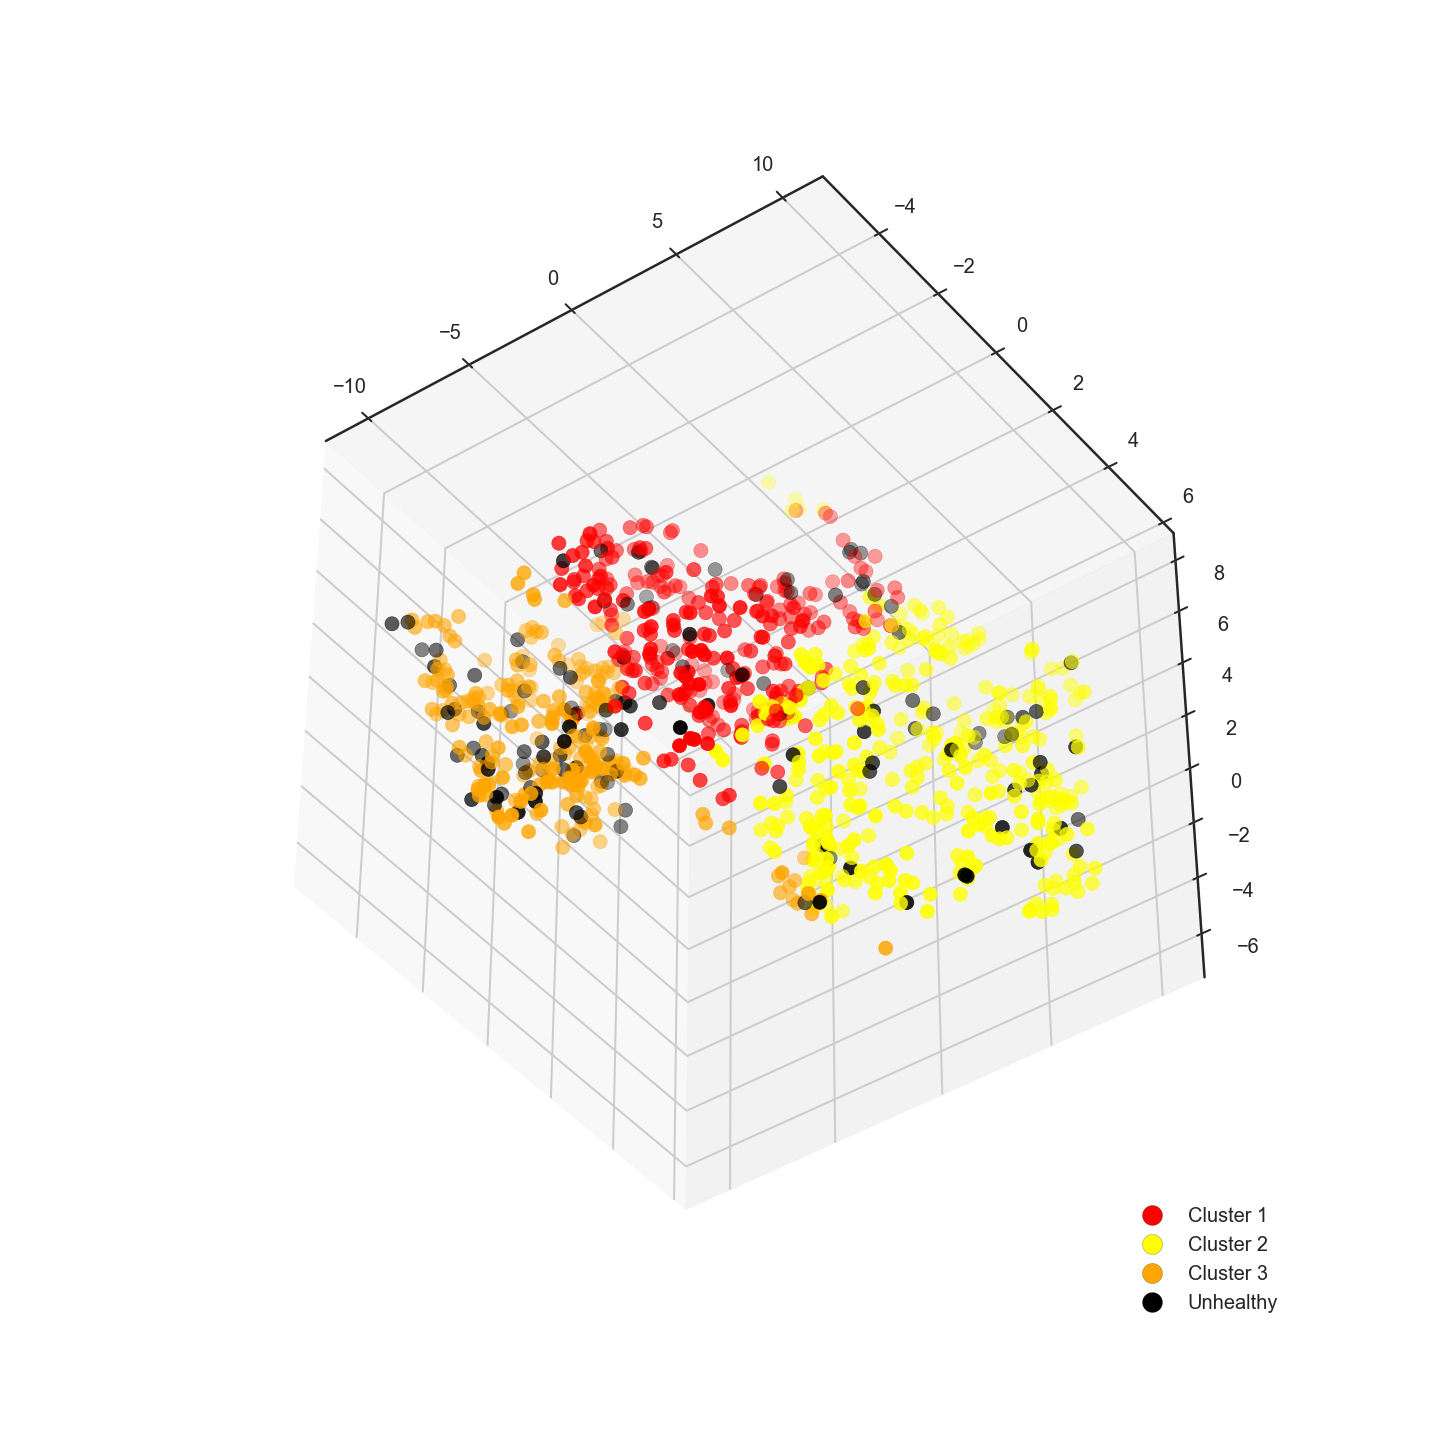

In [257]:
%matplotlib notebook
fig = plt.figure('K-Means on Slovakian Youth', figsize=(10,10))
ax = fig.gca(projection='3d')
ax.scatter(tsne_df["tsne-3d-one"], tsne_df["tsne-3d-two"],tsne_df["tsne-3d-three"], c=tsne_df['health_color'], s=50)
# ax.set_xlabel('PC 1')
# ax.set_ylabel('PC 2')
# ax.set_zlabel('PC 3')

# rotate the axes and update

labelTups = [('Cluster 1', 0), ('Cluster 2', 1), ('Cluster 3', 2), ('Unhealthy', 3)]
colors = ['red', 'yellow', 'orange', 'black']
custom_lines = [Line2D([0], [0], linestyle="none", marker='.', markeredgecolor='k', markerfacecolor=c, markeredgewidth=.1, markersize=20) for c in colors]
ax.legend(custom_lines, [lt[0] for lt in labelTups], loc='right', bbox_to_anchor=(1, 0))

for angle in range(0, 360):
    ax.view_init(30)
    plt.draw()
    plt.pause(.001)

In [245]:
len(unhealthy[unhealthy.cluster == 0]) / len(cluster1), len(unhealthy[unhealthy.cluster == 1]) / len(cluster2), len(unhealthy[unhealthy.cluster == 2]) / len(cluster3)
print('\n')
len(unhealthy)

(0.11501597444089456, 0.09181141439205956, 0.20408163265306123)

133

## K Prototypes <a class="anchor" id="kproto"></a>  
[TOC](#toc)

In [206]:
tsne_df.head()

pca1      pca2      pca3  tsne-2d-one  tsne-2d-two  cluster   color  \
0 -0.311455 -0.236758  0.062602    -1.547407     4.143360        1  yellow   
1  0.773614 -0.426195  0.987077    -9.660729    -0.578301        2  orange   
2 -0.694116  1.235083  0.479860     3.268616    -3.440478        0     red   
3 -0.379335 -0.897407  1.009035     8.594351     0.855845        1  yellow   
4 -0.177317  0.035500  0.233278    -1.497497     0.859365        1  yellow   

   Gender_male      sex  tsne-3d-one  tsne-3d-two  tsne-3d-three  unhealthy  
0            0  magenta     0.477986     2.683565      -2.437229       1.00  
1            0  magenta    -4.782247    -2.148324      -2.997802       1.00  
2            0  magenta     1.274057    -1.347525       1.580679       1.25  
3            0  magenta     2.732177     1.393250      -5.219913       1.75  
4            0  magenta    -0.137771     1.337835      -1.824602       0.75

In [181]:
test = pd.DataFrame([[np.NaN,'q45',20],[123,'q45',2],[123,'a89',20],[77,'q45',3],[77,'a89',30],[92,'xt23',24],[92,'m33'],[92,'a89']], 
                    columns=['userid','product','price'])
test

userid product  price
0     NaN     q45   20.0
1   123.0     q45    2.0
2   123.0     a89   20.0
3    77.0     q45    3.0
4    77.0     a89   30.0
5    92.0    xt23   24.0
6    92.0     m33    NaN
7    92.0     a89    NaN

In [182]:
di = {'q45': 100}
test.replace({"product": di})
test

userid product  price
0     NaN     100   20.0
1   123.0     100    2.0
2   123.0     a89   20.0
3    77.0     100    3.0
4    77.0     a89   30.0
5    92.0    xt23   24.0
6    92.0     m33    NaN
7    92.0     a89    NaN

userid product  price
0     NaN     q45   20.0
1   123.0     q45    2.0
2   123.0     a89   20.0
3    77.0     q45    3.0
4    77.0     a89   30.0
5    92.0    xt23   24.0
6    92.0     m33    NaN
7    92.0     a89    NaN

In [183]:
testcols = ['userid', 'price']
test[testcols]=test[testcols].fillna(test.mode().iloc[0])
test

userid product  price
0    92.0     q45   20.0
1   123.0     q45    2.0
2   123.0     a89   20.0
3    77.0     q45    3.0
4    77.0     a89   30.0
5    92.0    xt23   24.0
6    92.0     m33   20.0
7    92.0     a89   20.0

In [184]:
testcols = test.columns
for col in testcols:
    test.loc[test[col].isnull(), col] = test[col].mode()[0]
test

userid product  price
0    92.0     q45   20.0
1   123.0     q45    2.0
2   123.0     a89   20.0
3    77.0     q45    3.0
4    77.0     a89   30.0
5    92.0    xt23   24.0
6    92.0     m33   20.0
7    92.0     a89   20.0

In [185]:
test[col].mode()

0    20.0
dtype: float64

In [186]:
test.isna().sum()

userid     0
product    0
price      0
dtype: int64

In [187]:
test = test.fillna(test.mean().round())

In [188]:
test.isna().sum()

userid     0
product    0
price      0
dtype: int64

In [189]:
test

userid product  price
0    92.0     q45   20.0
1   123.0     q45    2.0
2   123.0     a89   20.0
3    77.0     q45    3.0
4    77.0     a89   30.0
5    92.0    xt23   24.0
6    92.0     m33   20.0
7    92.0     a89   20.0

In [190]:
abs(test)

TypeError: bad operand type for abs(): 'str'

In [254]:
pca3_train.shape

(1010, 3)